## IMPORTING REQUIRED LIBRARIES

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 15)

## Importing Dataset

In [2]:
batter = pd.read_csv("Batting Cluster Dataset.csv")
batter

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,prelim_metric,prelim_rank
0,V Kohli,IND,52.73,137.96,0.163,4.421,0.290,0.037,17.589,0.364,72.746,Best
1,RG Sharma,IND,31.32,139.24,0.192,3.786,0.121,0.071,9.779,0.264,43.610,Best
2,MJ Guptill,NZ,31.81,135.70,0.185,4.085,0.059,0.025,10.653,0.203,43.166,Best
3,Babar Azam,PAK,41.48,128.40,0.156,4.327,0.143,0.051,17.173,0.367,53.260,Best
4,PR Stirling,IRE,28.63,135.83,0.206,3.977,0.085,0.100,8.415,0.192,38.888,Best
...,...,...,...,...,...,...,...,...,...,...,...,...
1918,T Shamsi,SA,1.80,34.61,0.000,0.000,0.615,0.385,0.692,0.000,0.623,Poor
1919,AR Balla,CAM,1.14,23.52,0.000,0.000,0.125,0.375,1.000,0.000,0.268,Poor
1920,Xie Kunkun,CHN,2.00,22.22,0.000,0.000,0.000,0.250,2.000,0.000,0.444,Poor
1921,P Bhart,NOR,2.50,20.00,0.000,0.000,0.500,0.250,1.250,0.000,0.500,Poor


In [3]:
clb = batter.copy().drop(['name','country','prelim_metric','prelim_rank'],axis=1)
clb

,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
0,52.73,137.96,0.163,4.421,0.290,0.037,17.589,0.364
1,31.32,139.24,0.192,3.786,0.121,0.071,9.779,0.264
2,31.81,135.70,0.185,4.085,0.059,0.025,10.653,0.203
3,41.48,128.40,0.156,4.327,0.143,0.051,17.173,0.367
4,28.63,135.83,0.206,3.977,0.085,0.100,8.415,0.192
...,...,...,...,...,...,...,...,...
1918,1.80,34.61,0.000,0.000,0.615,0.385,0.692,0.000
1919,1.14,23.52,0.000,0.000,0.125,0.375,1.000,0.000
1920,2.00,22.22,0.000,0.000,0.000,0.250,2.000,0.000
1921,2.50,20.00,0.000,0.000,0.500,0.250,1.250,0.000


In [4]:
cols = batter.columns.tolist()
cols

['name',
 'country',
 'average',
 'strike_rate',
 'boundary_per_ball',
 'boundary_index',
 'not_out_pct',
 'duck_index',
 'RwoB_index',
 'big_match_index',
 'prelim_metric',
 'prelim_rank']

####  Feature Scaling

In [5]:
from sklearn.preprocessing import Normalizer

In [6]:
norm = Normalizer()
clb_scaled = norm.fit_transform(clb)

In [7]:
clb_scaled = pd.DataFrame(clb_scaled,columns=clb.columns.tolist())
clb_scaled

,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
0,0.354359,0.927127,0.001095,0.029710,0.001949,0.000249,0.118203,0.002446
1,0.218862,0.972997,0.001342,0.026456,0.000846,0.000496,0.068335,0.001845
2,0.227466,0.970360,0.001323,0.029211,0.000422,0.000179,0.076177,0.001452
3,0.304794,0.943481,0.001146,0.031795,0.001051,0.000375,0.126187,0.002697
4,0.205784,0.976306,0.001481,0.028585,0.000611,0.000719,0.060485,0.001380
...,...,...,...,...,...,...,...,...
1918,0.051916,0.998233,0.000000,0.000000,0.017738,0.011104,0.019959,0.000000
1919,0.048362,0.997788,0.000000,0.000000,0.005303,0.015909,0.042423,0.000000
1920,0.089283,0.991934,0.000000,0.000000,0.000000,0.011160,0.089283,0.000000
1921,0.123749,0.989996,0.000000,0.000000,0.024750,0.012375,0.061875,0.000000


In [8]:
batter_scaled = clb_scaled.copy()
batter_scaled['name'] = batter['name']
batter_scaled['country'] = batter['country']
batter_scaled

,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,name,country
0,0.354359,0.927127,0.001095,0.029710,0.001949,0.000249,0.118203,0.002446,V Kohli,IND
1,0.218862,0.972997,0.001342,0.026456,0.000846,0.000496,0.068335,0.001845,RG Sharma,IND
2,0.227466,0.970360,0.001323,0.029211,0.000422,0.000179,0.076177,0.001452,MJ Guptill,NZ
3,0.304794,0.943481,0.001146,0.031795,0.001051,0.000375,0.126187,0.002697,Babar Azam,PAK
4,0.205784,0.976306,0.001481,0.028585,0.000611,0.000719,0.060485,0.001380,PR Stirling,IRE
...,...,...,...,...,...,...,...,...,...,...
1918,0.051916,0.998233,0.000000,0.000000,0.017738,0.011104,0.019959,0.000000,T Shamsi,SA
1919,0.048362,0.997788,0.000000,0.000000,0.005303,0.015909,0.042423,0.000000,AR Balla,CAM
1920,0.089283,0.991934,0.000000,0.000000,0.000000,0.011160,0.089283,0.000000,Xie Kunkun,CHN
1921,0.123749,0.989996,0.000000,0.000000,0.024750,0.012375,0.061875,0.000000,P Bhart,NOR


In [9]:
cols = batter_scaled.columns.tolist()
cols = cols[-2:]+cols[:-2]
batter_scaled = batter_scaled[cols]
batter_scaled

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
0,V Kohli,IND,0.354359,0.927127,0.001095,0.029710,0.001949,0.000249,0.118203,0.002446
1,RG Sharma,IND,0.218862,0.972997,0.001342,0.026456,0.000846,0.000496,0.068335,0.001845
2,MJ Guptill,NZ,0.227466,0.970360,0.001323,0.029211,0.000422,0.000179,0.076177,0.001452
3,Babar Azam,PAK,0.304794,0.943481,0.001146,0.031795,0.001051,0.000375,0.126187,0.002697
4,PR Stirling,IRE,0.205784,0.976306,0.001481,0.028585,0.000611,0.000719,0.060485,0.001380
...,...,...,...,...,...,...,...,...,...,...
1918,T Shamsi,SA,0.051916,0.998233,0.000000,0.000000,0.017738,0.011104,0.019959,0.000000
1919,AR Balla,CAM,0.048362,0.997788,0.000000,0.000000,0.005303,0.015909,0.042423,0.000000
1920,Xie Kunkun,CHN,0.089283,0.991934,0.000000,0.000000,0.000000,0.011160,0.089283,0.000000
1921,P Bhart,NOR,0.123749,0.989996,0.000000,0.000000,0.024750,0.012375,0.061875,0.000000


## KMeans Clustering

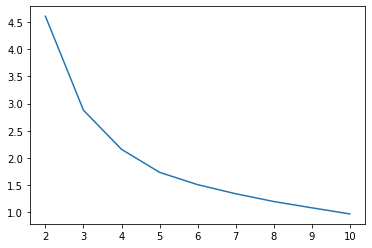

In [10]:
wcss = []
for i in range(2,11,1):
  km = KMeans(i).fit(clb_scaled)
  wcss.append(km.inertia_)
plt.plot(np.arange(2,11,1),wcss)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5095558919544358
For n_clusters = 3 The average silhouette_score is : 0.46272169142606767
For n_clusters = 4 The average silhouette_score is : 0.40811238158745555
For n_clusters = 5 The average silhouette_score is : 0.38858699933510055
For n_clusters = 6 The average silhouette_score is : 0.33309571135126853
For n_clusters = 7 The average silhouette_score is : 0.3228290660598117
For n_clusters = 8 The average silhouette_score is : 0.326725133423013
For n_clusters = 9 The average silhouette_score is : 0.3189939880147813
For n_clusters = 10 The average silhouette_score is : 0.3265848913810524


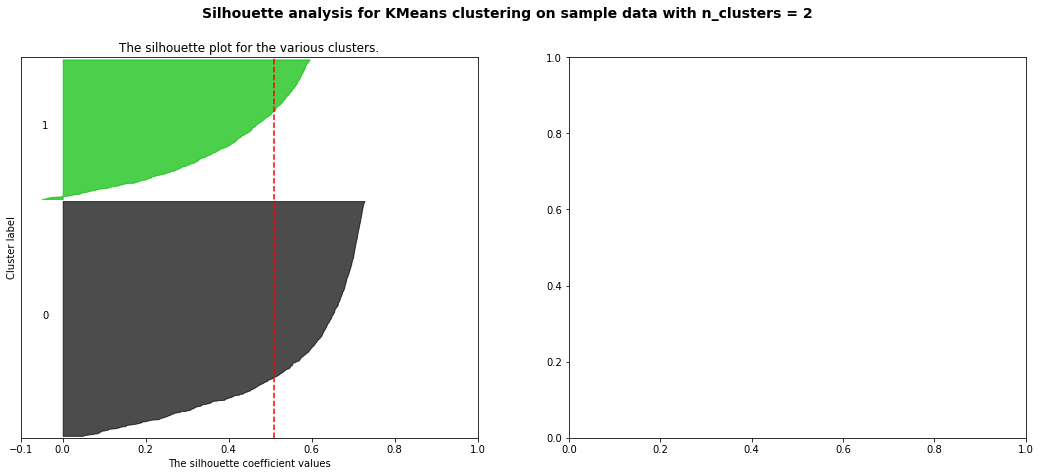

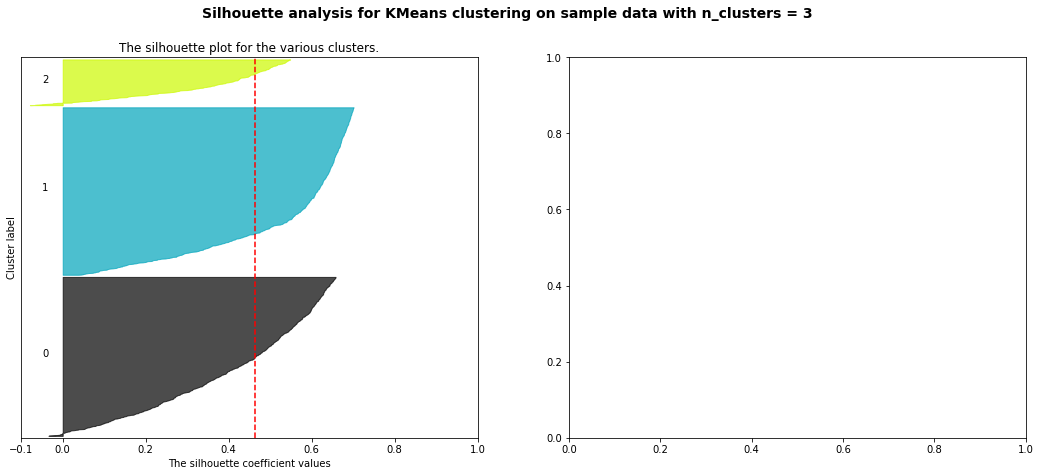

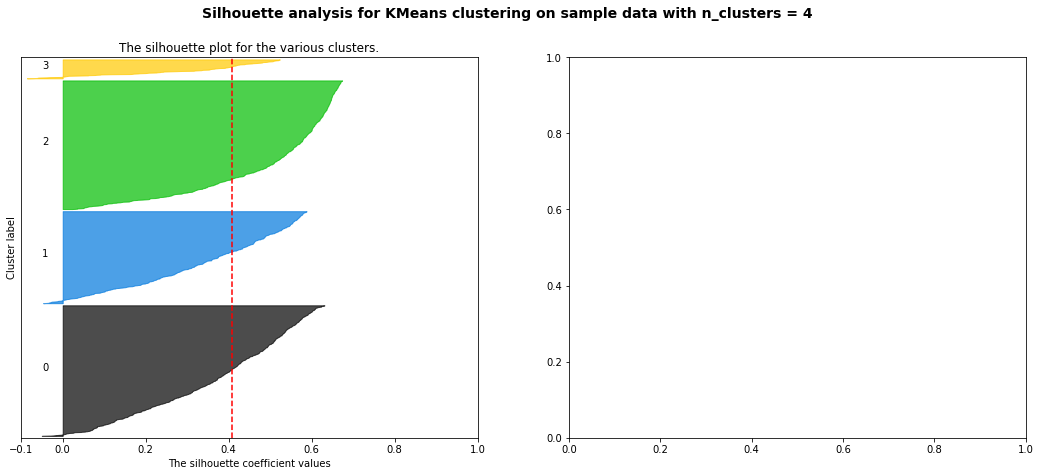

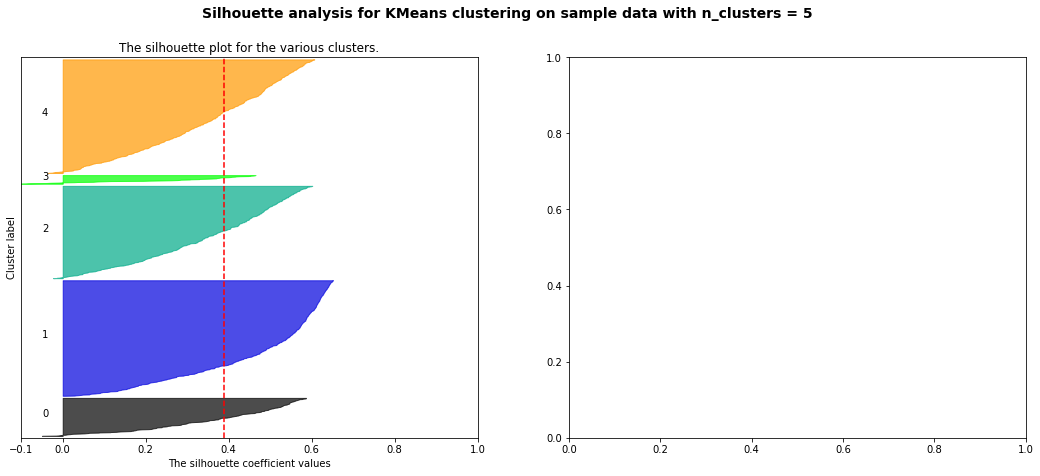

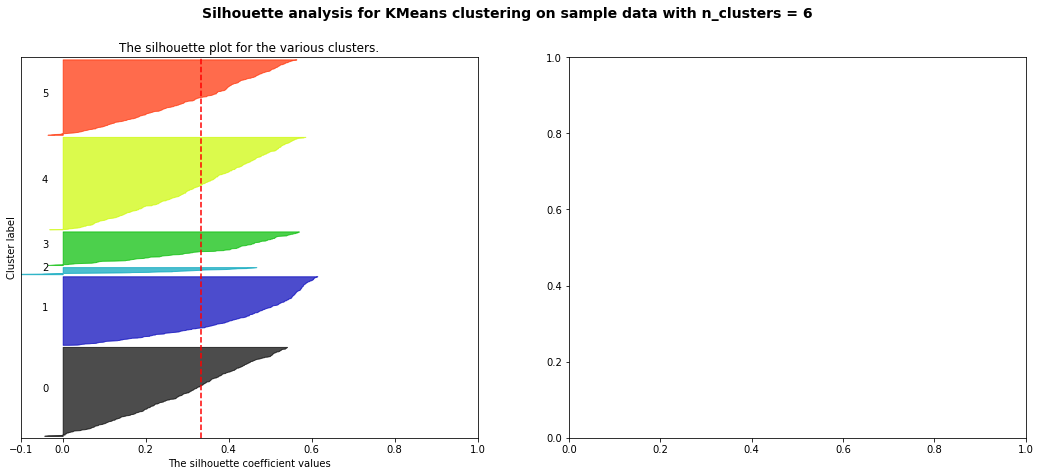

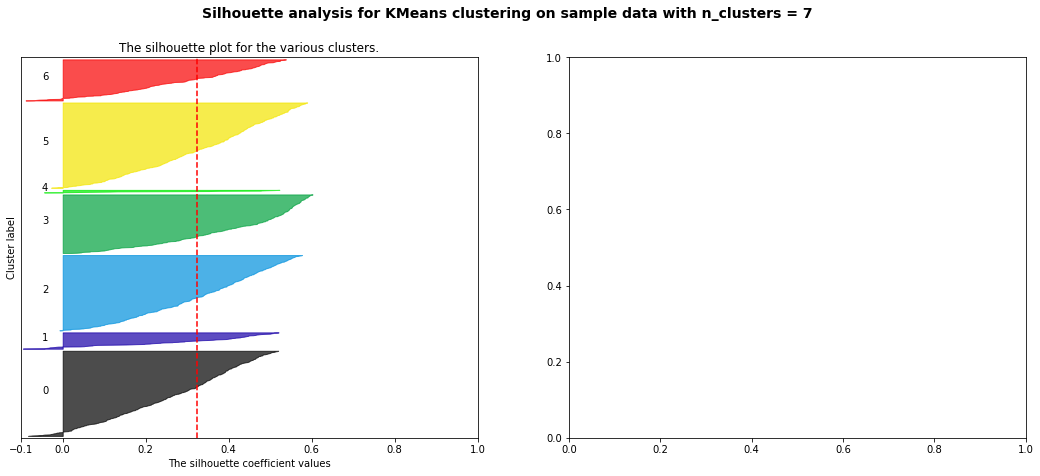

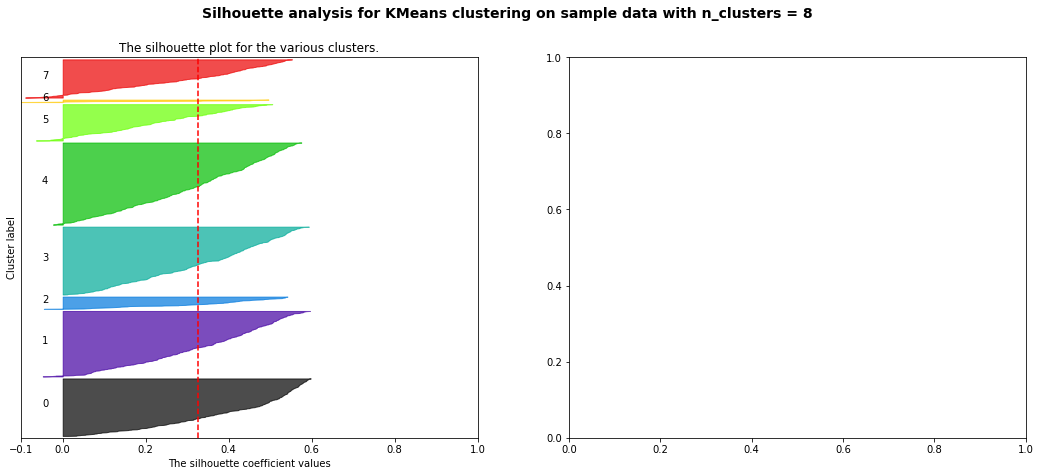

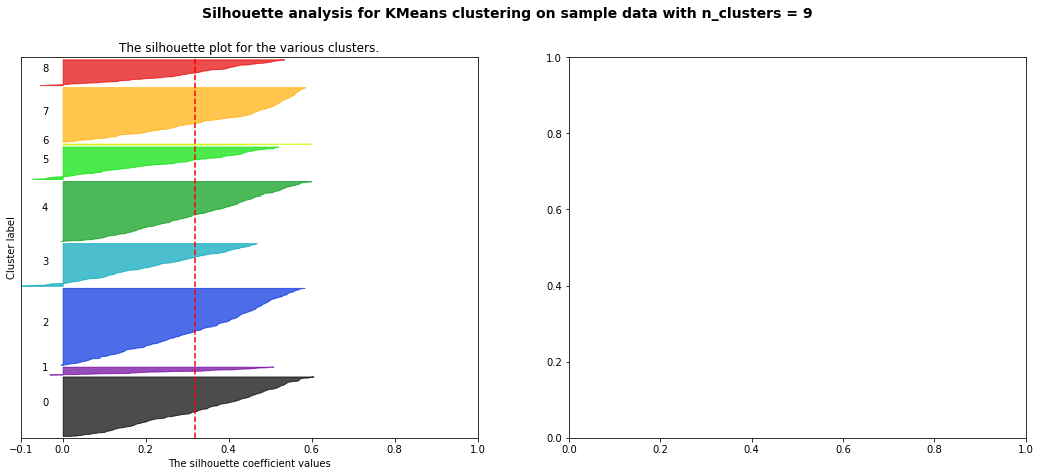

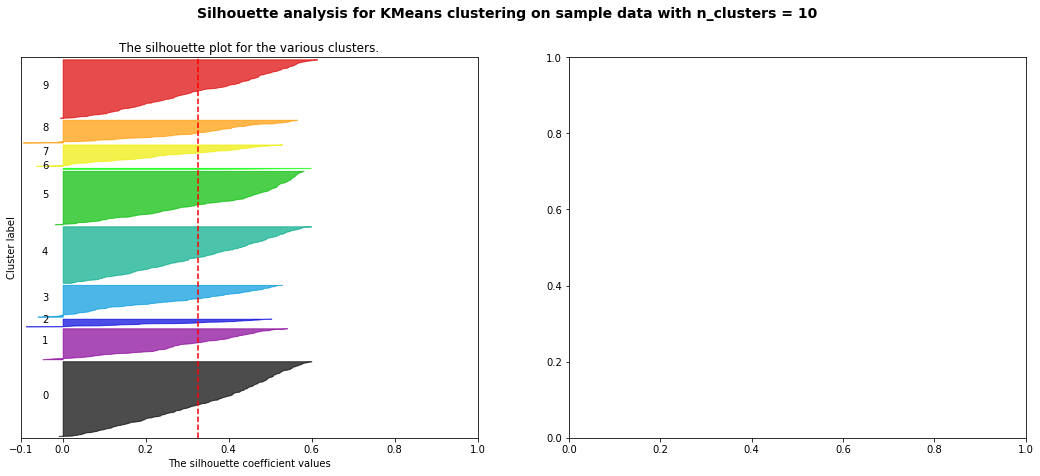

In [11]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(clb_scaled)+(n_clusters+1)*10])
    
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(clb_scaled)
    
    silhouette_avg = silhouette_score(clb_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    sample_silhouette_values = silhouette_samples(clb_scaled, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [12]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(clb_scaled)

In [13]:
ypred_kmeans

array([2, 1, 1, ..., 3, 0, 3])

In [14]:
print('Silhouette score :',np.round(silhouette_score(clb_scaled, ypred_kmeans, metric='euclidean'),3))
print('Calinski-Harabasz Index :',np.round(metrics.calinski_harabasz_score(clb_scaled, ypred_kmeans),3))
print('Davies-Bouldin Index  :',np.round(metrics.davies_bouldin_score(clb_scaled, ypred_kmeans),3))

Silhouette score : 0.406
Calinski-Harabasz Index : 2533.161
Davies-Bouldin Index  : 0.798


In [15]:
results = batter_scaled
results['kmeans'] = ypred_kmeans

<Axes: xlabel='kmeans', ylabel='count'>

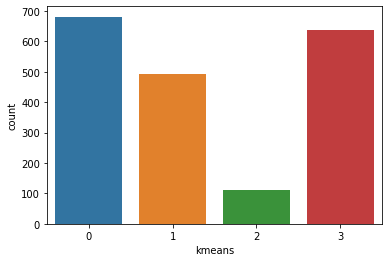

In [16]:
sns.countplot(results['kmeans'])

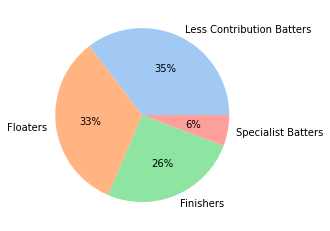

In [17]:
plt.pie(results['kmeans'].value_counts(), colors= sns.color_palette('pastel'), autopct='%.0f%%', labels = ['Less Contribution Batters','Floaters','Finishers','Specialist Batters'])
plt.show()

In [18]:
np.round(kmodel.cluster_centers_,3)

array([[0.152, 0.986, 0.001, 0.014, 0.002, 0.001, 0.062, 0.   ],
       [0.216, 0.972, 0.001, 0.02 , 0.002, 0.001, 0.085, 0.001],
       [0.324, 0.938, 0.001, 0.022, 0.004, 0.001, 0.101, 0.001],
       [0.094, 0.994, 0.001, 0.008, 0.002, 0.002, 0.037, 0.   ]])

In [19]:
columns = clb_scaled.columns
columns

Index(['average', 'strike_rate', 'boundary_per_ball', 'boundary_index',
       'not_out_pct', 'duck_index', 'RwoB_index', 'big_match_index'],
      dtype='object')

In [20]:
cluster_center = pd.DataFrame(data=np.round(kmodel.cluster_centers_,3) , columns = columns, index=('Floaters','Less Contribution Batters','Finishers','Specialist Batters'))
cluster_center['No. of Batters'] = [431,458,292,121]

cols = cluster_center.columns.tolist()
cols = cols[-1:] + cols[:-1]


cluster_center = cluster_center [cols]
cluster_center

,No. of Batters,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
Floaters,431,0.152,0.986,0.001,0.014,0.002,0.001,0.062,0.000
Less Contribution Batters,458,0.216,0.972,0.001,0.020,0.002,0.001,0.085,0.001
Finishers,292,0.324,0.938,0.001,0.022,0.004,0.001,0.101,0.001
Specialist Batters,121,0.094,0.994,0.001,0.008,0.002,0.002,0.037,0.000


In [21]:
top10countries = ['INDIA','ENG','PAK','SA','NZ','AUS','WI','SL','BAN','AFG']

In [22]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 3)].head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
66,Shahid Afridi,PAK,0.118513,0.992016,0.001230,0.012790,0.000873,0.000582,0.041136,0.000291,3
190,AD Russell,WI,0.123995,0.991958,0.001393,0.011605,0.002117,0.001005,0.022421,0.000114,3
256,DJG Sammy,WI,0.116186,0.992763,0.001286,0.009841,0.002329,0.000390,0.028609,0.000000,3
279,Asif Ali,PAK,0.111983,0.993025,0.001097,0.009071,0.001964,0.000608,0.035692,0.000000,3
286,PWH de Silva,SL,0.112279,0.992649,0.001153,0.010131,0.001794,0.000657,0.043966,0.000160,3
305,C de Grandhomme,NZ,0.113227,0.992709,0.001119,0.010490,0.001284,0.001105,0.039924,0.000553,3
314,Shafiqullah,AFG,0.112522,0.993212,0.001326,0.010739,0.001955,0.000813,0.027344,0.000164,3
323,Imad Wasim,PAK,0.114407,0.992586,0.001183,0.009933,0.002058,0.001025,0.039741,0.000173,3
362,CJ Jordan,ENG,0.108928,0.993685,0.001190,0.007254,0.003345,0.000422,0.025665,0.000000,3
375,JO Holder,WI,0.120400,0.991871,0.001094,0.009811,0.002179,0.001094,0.039907,0.000000,3


In [23]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 2)].head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
3,Babar Azam,PAK,0.304794,0.943481,0.001146,0.031795,0.001051,0.000375,0.126187,0.002697,2
7,Mohammad Rizwan,PAK,0.356084,0.923772,0.001045,0.031508,0.001589,0.000298,0.137281,0.002685,2
25,JP Duminy,SA,0.291536,0.951486,0.001025,0.021006,0.002510,0.000603,0.096076,0.001108,2
82,DP Conway,NZ,0.304753,0.945394,0.001143,0.029113,0.001546,0.000000,0.111814,0.001736,2
145,JE Root,ENG,0.270442,0.956238,0.001158,0.027256,0.001264,0.000507,0.108268,0.001264,2
176,Misbah-ul-Haq,PAK,0.320169,0.940369,0.000845,0.017818,0.003260,0.000503,0.113442,0.000751,2
220,JH Kallis,SA,0.279908,0.953126,0.001086,0.026386,0.001390,0.000000,0.111804,0.001733,2
499,ML Hayden,AUS,0.335111,0.939591,0.001528,0.036273,0.002174,0.000000,0.059482,0.002899,2
719,JM Kemp,SA,0.370118,0.925259,0.001233,0.028129,0.003129,0.000000,0.078137,0.001043,2
914,AC Voges,AUS,0.351468,0.924907,0.000668,0.015172,0.003034,0.000000,0.144137,0.001517,2


In [24]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 1)].head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
2,MJ Guptill,NZ,0.227466,0.970360,0.001323,0.029211,0.000422,0.000179,0.076177,0.001452,1
5,AJ Finch,AUS,0.233089,0.969143,0.001346,0.028653,0.000796,0.000530,0.074863,0.001516,1
6,DA Warner,AUS,0.225911,0.970839,0.001340,0.027758,0.000763,0.000419,0.075228,0.001807,1
8,JC Buttler,ENG,0.234530,0.969068,0.001266,0.024183,0.001407,0.000402,0.072884,0.001474,1
9,Mohammad Hafeez,PAK,0.211201,0.974032,0.001269,0.024169,0.000958,0.000519,0.077895,0.001038,1
10,KS Williamson,NZ,0.259547,0.959053,0.001115,0.026321,0.001006,0.000366,0.110251,0.001559,1
11,EJG Morgan,ENG,0.204909,0.976294,0.001219,0.020505,0.001405,0.000201,0.066606,0.000939,1
12,Shoaib Malik,PAK,0.240152,0.966763,0.001054,0.018367,0.002285,0.000139,0.085750,0.000623,1
13,Shakib Al Hasan,BAN,0.190421,0.978488,0.001199,0.020121,0.001103,0.000552,0.076768,0.000823,1
14,Q de Kock,SA,0.229712,0.970060,0.001370,0.028700,0.000805,0.000537,0.073406,0.001434,1


In [25]:
results[(results.country.isin(top10countries)) & (results['kmeans'] == 0)].head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
17,GJ Maxwell,AUS,0.184512,0.980837,0.001280,0.020355,0.001014,0.000214,0.059122,0.001156,0
31,Mohammad Nabi,AFG,0.158990,0.985665,0.001179,0.015420,0.001343,0.000422,0.054264,0.000357,0
41,Litton Das,BAN,0.176397,0.981506,0.001312,0.023227,0.000105,0.000420,0.070626,0.001042,0
50,KA Pollard,WI,0.183737,0.981429,0.001206,0.016885,0.001837,0.000261,0.052412,0.000523,0
54,JJ Roy,ENG,0.172536,0.983132,0.001436,0.024784,0.000114,0.000779,0.055369,0.000893,0
56,Mushfiqur Rahim,BAN,0.166528,0.983350,0.001069,0.014986,0.001470,0.000735,0.071150,0.000556,0
62,E Lewis,WI,0.192714,0.979820,0.001464,0.027157,0.000374,0.000496,0.045506,0.001734,0
65,Fakhar Zaman,PAK,0.166628,0.983727,0.001312,0.021245,0.000330,0.000668,0.063735,0.000890,0
70,MD Shanaka,SL,0.167880,0.984172,0.001196,0.015964,0.001753,0.000969,0.054411,0.000485,0
77,BKG Mendis,SL,0.175972,0.981802,0.001234,0.021365,0.000264,0.000668,0.068105,0.001601,0


In [26]:
results = np.round(results,3)

## Defining Accuracy Metrics

In [27]:
def get_accuracy_metrics(y_pred,y_test):

  bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
  print ('The balanced accuracy on test data is %s' % (round(bal_acc,5)))

  f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
  print('F1 score micro :',round(f1_micro ,5))

  f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
  print('F1 score macro :',round(f1_macro ,5))

  f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
  print('F1 score weighted :',round(f1_weighted,5))

  recall = metrics.recall_score(y_test, y_pred, average='macro')
  print('Recall score :',recall)

  precision = metrics.precision_score(y_test, y_pred, average='macro')
  print('Precision score :',precision)

  print('\n\n\n\n\n\n\n\n')

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_matrix,annot=True, fmt="d",cmap="YlGnBu")


## Train Test Split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(results.drop("kmeans",axis=1),results['kmeans'],test_size = 0.3)
x_train.drop(['name','country'],axis=1,inplace=True)
x_test.drop(['name','country'],axis=1,inplace=True)

#### Random Forest

In [29]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred_rfc = rfc.predict(x_test)

In [30]:
rfc_feat = np.round(rfc.feature_importances_.tolist(),3)
rfc_dict = dict(zip(columns,np.array(rfc_feat)))
rfc_dict

{'average': 0.385,
 'strike_rate': 0.382,
 'boundary_per_ball': 0.005,
 'boundary_index': 0.071,
 'not_out_pct': 0.023,
 'duck_index': 0.014,
 'RwoB_index': 0.099,
 'big_match_index': 0.023}

The balanced accuracy on test data is 0.98776
F1 score micro : 0.98614
F1 score macro : 0.98884
F1 score weighted : 0.98618
Recall score : 0.9877618855761483
Precision score : 0.9902912621359223











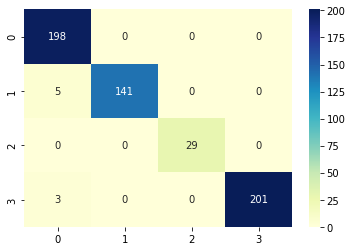

In [31]:
get_accuracy_metrics(ypred_rfc,y_test)

In [32]:
final_index = results.copy()

In [33]:
final_index['rfc_score'] = 0
for i in columns:
  final_index['rfc_score'] = np.round(final_index['rfc_score'] + (final_index[i] * rfc_dict.get(i)),3)  

#### KNN

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
ypred_knn = knn.predict(x_test)

The balanced accuracy on test data is 0.99066
F1 score micro : 0.9896
F1 score macro : 0.98769
F1 score weighted : 0.9896
Recall score : 0.9906625684728021
Precision score : 0.9849432905403055











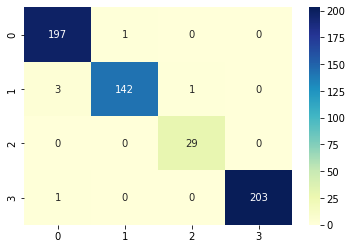

In [35]:
get_accuracy_metrics(ypred_knn,y_test)

#### XGBoost

In [36]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
ypred_xgb = xgb.predict(x_test)

The balanced accuracy on test data is 0.9852
F1 score micro : 0.98267
F1 score macro : 0.98223
F1 score weighted : 0.98267
Recall score : 0.9851994969843479
Precision score : 0.979475949509403











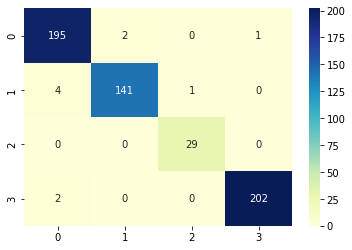

In [37]:
get_accuracy_metrics(ypred_xgb,y_test)

In [38]:
importance = np.round(xgb.feature_importances_,3)
dict_xgb = dict(zip(columns,importance))
dict_xgb

{'average': 0.067,
 'strike_rate': 0.896,
 'boundary_per_ball': 0.013,
 'boundary_index': 0.009,
 'not_out_pct': 0.003,
 'duck_index': 0.004,
 'RwoB_index': 0.006,
 'big_match_index': 0.002}

In [39]:
final_index['xgb_score'] = 0
for i in columns:
  final_index['xgb_score'] = np.round(final_index['xgb_score'] + (final_index[i] * dict_xgb.get(i)),3)   

In [40]:
final_index[final_index.country.isin(top10countries)].sort_values('xgb_score',ascending = False).head(10).drop(['rfc_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,xgb_score
1268,Imran Farhat,PAK,0.099,0.995,0.002,0.018,0.000,0.001,0.026,0.000,3,0.899
411,Mashrafe Mortaza,BAN,0.098,0.995,0.001,0.010,0.002,0.001,0.024,0.000,3,0.899
911,C Green,AUS,0.099,0.995,0.002,0.018,0.000,0.000,0.016,0.001,3,0.899
1389,Nasum Ahmed,BAN,0.098,0.995,0.001,0.004,0.006,0.003,0.024,0.000,3,0.899
1022,JE Taylor,WI,0.102,0.995,0.001,0.008,0.003,0.001,0.022,0.000,3,0.899
1699,Arafat Sunny,BAN,0.099,0.995,0.001,0.006,0.004,0.000,0.023,0.000,3,0.899
687,KMDN Kulasekara,SL,0.087,0.996,0.001,0.006,0.003,0.001,0.033,0.000,3,0.898
1103,B Lee,AUS,0.117,0.993,0.001,0.008,0.003,0.001,0.024,0.000,3,0.898
1014,SCJ Broad,ENG,0.073,0.997,0.001,0.004,0.004,0.001,0.028,0.000,3,0.898
1015,DT Christian,AUS,0.115,0.993,0.001,0.007,0.003,0.001,0.030,0.000,3,0.898


#### Voting Ensembles

In [41]:
xgb = XGBClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [42]:
voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb), ('decision_tree', dtree)],
    voting='hard')

In [43]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xg_boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_...
                                            interaction_constraints=None,
                  

In [44]:
for clf in (rfc,dtree,xgb,voting):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9861351819757366
DecisionTreeClassifier 0.9861351819757366
XGBClassifier 0.9826689774696707
VotingClassifier 0.9844020797227037


In [45]:
ypred_voting = voting.predict(x_test)

The balanced accuracy on test data is 0.98646
F1 score micro : 0.9844
F1 score macro : 0.98371
F1 score weighted : 0.98441
Recall score : 0.9864621232469741
Precision score : 0.9812488336185314











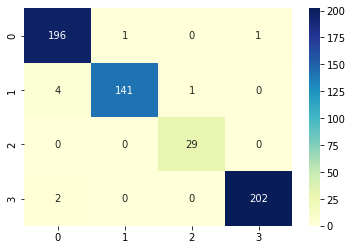

In [46]:
get_accuracy_metrics(ypred_voting,y_test)

In [47]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    ## print(feature_importance.values())

    fe_scores = [0]*len(list(feature_importance.values())[0])

    ## print(fe_scores)
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [48]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/3,1/3,1/3]),3)))
dict_voting

{'average': 0.197,
 'strike_rate': 0.712,
 'boundary_per_ball': 0.005,
 'boundary_index': 0.023,
 'not_out_pct': 0.008,
 'duck_index': 0.007,
 'RwoB_index': 0.039,
 'big_match_index': 0.008}

In [49]:
final_index['voting_score'] = 0
for i in columns:
  final_index['voting_score'] = np.round(final_index['voting_score'] + (final_index[i] * dict_voting.get(i)),3)

In [50]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).head(10).drop(['rfc_score','xgb_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,voting_score
28,DJ Malan,ENG,0.264,0.960,0.001,0.031,0.001,0.000,0.090,0.002,1,0.741
455,A Symonds,AUS,0.273,0.959,0.001,0.022,0.002,0.001,0.075,0.001,1,0.741
2,MJ Guptill,NZ,0.227,0.970,0.001,0.029,0.000,0.000,0.076,0.001,1,0.740
90,KP Pietersen,ENG,0.258,0.961,0.001,0.028,0.001,0.000,0.096,0.001,1,0.740
51,GD Phillips,NZ,0.217,0.973,0.001,0.022,0.001,0.000,0.078,0.002,1,0.740
52,F du Plessis,SA,0.254,0.962,0.001,0.027,0.001,0.000,0.096,0.002,1,0.740
53,LMP Simmons,WI,0.216,0.974,0.001,0.025,0.001,0.001,0.067,0.001,1,0.740
667,MN van Wyk,SA,0.253,0.965,0.001,0.032,0.001,0.000,0.063,0.003,1,0.740
59,DPMD Jayawardene,SL,0.231,0.969,0.001,0.027,0.001,0.001,0.080,0.001,1,0.740
294,F Behardien,SA,0.244,0.967,0.001,0.013,0.004,0.000,0.069,0.000,1,0.740


## One Against All

#### For 0

In [51]:
middle_ovr = pd.DataFrame()

In [53]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:0,0:1})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [54]:
rfc_0 = RandomForestClassifier()
rfc_0.fit(X_train, y_train)
ypred_rfc_0 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_0 = np.round(rfc_0.feature_importances_,3)
dict_0 = dict(zip(columns,fi_0))
dict_0

{'average': 0.397,
 'strike_rate': 0.424,
 'boundary_per_ball': 0.004,
 'boundary_index': 0.041,
 'not_out_pct': 0.019,
 'duck_index': 0.011,
 'RwoB_index': 0.09,
 'big_match_index': 0.013}

In [55]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
17,GJ Maxwell,AUS,0.185,0.981,0.001,0.020,0.001,0.000,0.059,0.001,1
21,A Balbirnie,IRE,0.183,0.980,0.001,0.023,0.000,0.000,0.072,0.001,1
24,KJ O'Brien,IRE,0.160,0.985,0.001,0.018,0.001,0.001,0.060,0.001,1
31,Mohammad Nabi,AFG,0.159,0.986,0.001,0.015,0.001,0.000,0.054,0.000,1
41,Litton Das,BAN,0.176,0.982,0.001,0.023,0.000,0.000,0.071,0.001,1
...,...,...,...,...,...,...,...,...,...,...,...
1878,Thuya Aung,MYAN,0.119,0.989,0.001,0.007,0.000,0.007,0.091,0.000,1
1894,ME Leoela,LES,0.158,0.986,0.000,0.000,0.014,0.004,0.053,0.000,1
1896,R Rampaul,WI,0.143,0.989,0.000,0.000,0.014,0.000,0.041,0.000,1
1904,SP Gauchan,NEP,0.141,0.986,0.000,0.000,0.013,0.013,0.085,0.000,1


In [56]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_0.get(i)),3)

In [57]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,rbml_score
62,E Lewis,WI,0.193,0.980,0.001,0.027,0.000,0.000,0.046,0.002,0.498
225,C Campher,IRE,0.184,0.980,0.001,0.016,0.002,0.000,0.073,0.001,0.497
1318,Jun Hyunwoo,SKOR,0.189,0.980,0.001,0.027,0.000,0.000,0.056,0.000,0.497
254,Ravinderpal Singh,CAN,0.187,0.980,0.001,0.021,0.001,0.000,0.064,0.001,0.497
183,Kamran Khan,QAT,0.189,0.980,0.001,0.027,0.000,0.000,0.054,0.001,0.497
136,ADS Fletcher,WI,0.186,0.980,0.001,0.020,0.001,0.001,0.064,0.001,0.497
21,A Balbirnie,IRE,0.183,0.980,0.001,0.023,0.000,0.000,0.072,0.001,0.496
634,RA Sealy,Caym,0.184,0.981,0.001,0.019,0.001,0.000,0.066,0.001,0.496
611,Shamim Hossain,BAN,0.183,0.981,0.001,0.020,0.001,0.000,0.066,0.001,0.496
117,Samiullah Shinwari,AFG,0.183,0.980,0.001,0.017,0.001,0.000,0.072,0.000,0.496


In [58]:
middle_ovr = results_new[results_new.kmeans == 1].copy()

#### For 1

In [59]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:1,2:0,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [60]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)
ypred_rfc_1 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_1 = np.round(rfc_1.feature_importances_,3)
dict_1 = dict(zip(columns,fi_1))
dict_1

{'average': 0.383,
 'strike_rate': 0.409,
 'boundary_per_ball': 0.004,
 'boundary_index': 0.065,
 'not_out_pct': 0.022,
 'duck_index': 0.008,
 'RwoB_index': 0.084,
 'big_match_index': 0.025}

In [61]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
1,RG Sharma,IND,0.219,0.973,0.001,0.026,0.001,0.000,0.068,0.002,1
2,MJ Guptill,NZ,0.227,0.970,0.001,0.029,0.000,0.000,0.076,0.001,1
4,PR Stirling,IRE,0.206,0.976,0.001,0.029,0.001,0.001,0.060,0.001,1
5,AJ Finch,AUS,0.233,0.969,0.001,0.029,0.001,0.001,0.075,0.002,1
6,DA Warner,AUS,0.226,0.971,0.001,0.028,0.001,0.000,0.075,0.002,1
...,...,...,...,...,...,...,...,...,...,...,...
1823,Mohammad Hasnain,PAK,0.252,0.968,0.001,0.003,0.010,0.000,0.010,0.000,1
1840,D Marks,MLT,0.269,0.961,0.000,0.000,0.009,0.000,0.067,0.000,1
1849,Shahid Mahmood,BHR,0.252,0.967,0.001,0.006,0.009,0.000,0.027,0.000,1
1859,CJ Dala,SA,0.269,0.962,0.001,0.004,0.011,0.000,0.053,0.000,1


In [62]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_1.get(i)),3)

In [63]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,rbml_score
178,N Nipiko,VAN,0.271,0.958,0.001,0.027,0.002,0.000,0.086,0.002,0.505
32,Virandeep Singh,MAL,0.269,0.959,0.001,0.030,0.001,0.001,0.089,0.002,0.504
455,A Symonds,AUS,0.273,0.959,0.001,0.022,0.002,0.001,0.075,0.001,0.504
1172,Raees Ahmadzai,AFG,0.268,0.958,0.001,0.009,0.004,0.000,0.096,0.000,0.504
838,Walid Ghauri,NOR,0.265,0.958,0.001,0.027,0.001,0.000,0.111,0.000,0.504
916,Dipanjan Dey,SWE,0.268,0.957,0.001,0.016,0.003,0.000,0.109,0.001,0.504
28,DJ Malan,ENG,0.264,0.960,0.001,0.031,0.001,0.000,0.090,0.002,0.504
541,PA Raikes,GIBR,0.261,0.959,0.001,0.024,0.002,0.000,0.107,0.002,0.503
1183,NL Smith,ITA,0.266,0.959,0.001,0.016,0.004,0.000,0.099,0.000,0.503
1425,FA Klokker,DEN,0.274,0.960,0.001,0.005,0.007,0.000,0.057,0.000,0.503


In [64]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

#### For 2

In [65]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:1,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [66]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
ypred_rfc_2 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_2 = np.round(rfc_2.feature_importances_,3)
dict_2 = dict(zip(columns,fi_2))
dict_2

{'average': 0.467,
 'strike_rate': 0.412,
 'boundary_per_ball': 0.001,
 'boundary_index': 0.026,
 'not_out_pct': 0.023,
 'duck_index': 0.004,
 'RwoB_index': 0.05,
 'big_match_index': 0.016}

In [67]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
0,V Kohli,IND,0.354,0.927,0.001,0.030,0.002,0.000,0.118,0.002,1
3,Babar Azam,PAK,0.305,0.943,0.001,0.032,0.001,0.000,0.126,0.003,1
7,Mohammad Rizwan,PAK,0.356,0.924,0.001,0.032,0.002,0.000,0.137,0.003,1
25,JP Duminy,SA,0.292,0.951,0.001,0.021,0.003,0.001,0.096,0.001,1
46,MS Dhoni,IND,0.285,0.956,0.001,0.015,0.004,0.000,0.075,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...
1790,B Jerkovic,CRT,0.499,0.860,0.000,0.005,0.014,0.000,0.106,0.000,1
1848,Mohammad Sami,PAK,0.287,0.957,0.001,0.007,0.010,0.000,0.044,0.000,1
1870,Manoj Adhikari,BHU,0.401,0.911,0.000,0.000,0.017,0.000,0.100,0.000,1
1877,Saud Munir,DEN,0.321,0.945,0.000,0.000,0.015,0.004,0.064,0.000,1


In [68]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_2.get(i)),3)

In [69]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,rbml_score
1515,HA Varaiya,KENYA,0.629,0.776,0.000,0.001,0.011,0.0,0.048,0.000,0.616
194,Sami Sohail,MWI,0.513,0.848,0.001,0.024,0.004,0.0,0.130,0.002,0.596
1790,B Jerkovic,CRT,0.499,0.860,0.000,0.005,0.014,0.0,0.106,0.000,0.592
523,MTMMJ Ave,COK,0.486,0.864,0.001,0.045,0.002,0.0,0.123,0.003,0.590
1235,RL Vitas,SRB,0.477,0.875,0.001,0.017,0.008,0.0,0.081,0.000,0.588
1095,Rehman Abdul,ITA,0.456,0.884,0.001,0.018,0.005,0.0,0.100,0.000,0.582
1603,NO Miller,WI,0.424,0.903,0.000,0.004,0.008,0.0,0.069,0.000,0.573
1069,S Thakur,ROM,0.409,0.909,0.001,0.023,0.005,0.0,0.069,0.002,0.570
591,S Ivetic,SRB,0.403,0.898,0.001,0.027,0.002,0.0,0.175,0.002,0.568
1870,Manoj Adhikari,BHU,0.401,0.911,0.000,0.000,0.017,0.0,0.100,0.000,0.567


In [70]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

#### For 3

In [71]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:1,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [72]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train, y_train)
ypred_rfc_3 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_3 = np.round(rfc_3.feature_importances_,3)
dict_3 = dict(zip(columns,fi_3))
dict_3

{'average': 0.309,
 'strike_rate': 0.47,
 'boundary_per_ball': 0.003,
 'boundary_index': 0.056,
 'not_out_pct': 0.008,
 'duck_index': 0.012,
 'RwoB_index': 0.119,
 'big_match_index': 0.025}

In [73]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans
66,Shahid Afridi,PAK,0.119,0.992,0.001,0.013,0.001,0.001,0.041,0.0,1
190,AD Russell,WI,0.124,0.992,0.001,0.012,0.002,0.001,0.022,0.0,1
210,RW Chakabva,ZIM,0.118,0.992,0.001,0.014,0.000,0.002,0.047,0.0,1
256,DJG Sammy,WI,0.116,0.993,0.001,0.010,0.002,0.000,0.029,0.0,1
262,MA Leask,SCOT,0.121,0.992,0.001,0.013,0.001,0.001,0.041,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1917,A Maheshwari,CRT,0.050,0.997,0.000,0.000,0.000,0.011,0.050,0.0,1
1918,T Shamsi,SA,0.052,0.998,0.000,0.000,0.018,0.011,0.020,0.0,1
1919,AR Balla,CAM,0.048,0.998,0.000,0.000,0.005,0.016,0.042,0.0,1
1920,Xie Kunkun,CHN,0.089,0.992,0.000,0.000,0.000,0.011,0.089,0.0,1


In [74]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_3.get(i)),3)

In [75]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,rbml_score
354,Mirza Ahsan,Aut,0.128,0.991,0.001,0.013,0.001,0.000,0.038,0.001,0.512
901,Amir Mangal,GER,0.129,0.991,0.001,0.012,0.002,0.000,0.032,0.000,0.511
972,Sachin Mandy,GER,0.123,0.991,0.001,0.014,0.001,0.002,0.048,0.000,0.511
1124,Amir Ali,OMA,0.129,0.991,0.001,0.011,0.002,0.000,0.034,0.000,0.511
1185,MK Anafie,Ghana,0.129,0.991,0.001,0.013,0.002,0.001,0.034,0.000,0.511
606,Mehidy Hasan Miraz,BAN,0.122,0.991,0.001,0.012,0.001,0.001,0.049,0.000,0.511
428,SO Ngoche,KENYA,0.126,0.991,0.001,0.010,0.003,0.001,0.039,0.000,0.511
726,Ijaz Hussain,ROM,0.125,0.991,0.001,0.014,0.002,0.000,0.044,0.000,0.511
839,JP Faulkner,AUS,0.124,0.991,0.001,0.006,0.003,0.000,0.048,0.000,0.510
861,Shahbaz Badar,BHR,0.113,0.991,0.001,0.012,0.000,0.003,0.065,0.000,0.510


In [76]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

### Role Based Metrics

In [77]:
middle_ovr

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rbml_score
17,GJ Maxwell,AUS,0.185,0.981,0.001,0.020,0.001,0.000,0.059,0.001,1,0.495
21,A Balbirnie,IRE,0.183,0.980,0.001,0.023,0.000,0.000,0.072,0.001,1,0.496
24,KJ O'Brien,IRE,0.160,0.985,0.001,0.018,0.001,0.001,0.060,0.001,1,0.488
31,Mohammad Nabi,AFG,0.159,0.986,0.001,0.015,0.001,0.000,0.054,0.000,1,0.487
41,Litton Das,BAN,0.176,0.982,0.001,0.023,0.000,0.000,0.071,0.001,1,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...
1917,A Maheshwari,CRT,0.050,0.997,0.000,0.000,0.000,0.011,0.050,0.000,1,0.490
1918,T Shamsi,SA,0.052,0.998,0.000,0.000,0.018,0.011,0.020,0.000,1,0.487
1919,AR Balla,CAM,0.048,0.998,0.000,0.000,0.005,0.016,0.042,0.000,1,0.489
1920,Xie Kunkun,CHN,0.089,0.992,0.000,0.000,0.000,0.011,0.089,0.000,1,0.505


In [78]:
final_index = pd.merge(final_index,middle_ovr[['name','country','rbml_score']],on=['name','country'],how='left')

In [79]:
final_index[final_index.country.isin(top10countries)].sort_values('rbml_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rbml_score
1603,NO Miller,WI,0.424,0.903,0.000,0.004,0.008,0.000,0.069,0.000,2,0.573
1432,Abu Hider,BAN,0.395,0.918,0.001,0.012,0.005,0.000,0.019,0.000,2,0.563
719,JM Kemp,SA,0.370,0.925,0.001,0.028,0.003,0.000,0.078,0.001,2,0.559
7,Mohammad Rizwan,PAK,0.356,0.924,0.001,0.032,0.002,0.000,0.137,0.003,2,0.555
914,AC Voges,AUS,0.351,0.925,0.001,0.015,0.003,0.000,0.144,0.002,2,0.552
499,ML Hayden,AUS,0.335,0.940,0.002,0.036,0.002,0.000,0.059,0.003,2,0.547
1214,AR Nurse,WI,0.334,0.942,0.001,0.010,0.006,0.000,0.038,0.000,2,0.546
176,Misbah-ul-Haq,PAK,0.320,0.940,0.001,0.018,0.003,0.001,0.113,0.001,2,0.542
3,Babar Azam,PAK,0.305,0.943,0.001,0.032,0.001,0.000,0.126,0.003,2,0.538
1733,Fareed Ahmad,AFG,0.313,0.949,0.001,0.012,0.007,0.000,0.029,0.000,2,0.538


In [80]:
final_index[final_index.country.isin(top10countries)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1603,NO Miller,WI,0.424,0.903,0.000,0.004,0.008,0.000,0.069,0.000,2,0.515,0.837,0.730,0.573
1432,Abu Hider,BAN,0.395,0.918,0.001,0.012,0.005,0.000,0.019,0.000,2,0.506,0.849,0.733,0.563
719,JM Kemp,SA,0.370,0.925,0.001,0.028,0.003,0.000,0.078,0.001,2,0.505,0.854,0.736,0.559
7,Mohammad Rizwan,PAK,0.356,0.924,0.001,0.032,0.002,0.000,0.137,0.003,2,0.506,0.853,0.734,0.555
914,AC Voges,AUS,0.351,0.925,0.001,0.015,0.003,0.000,0.144,0.002,2,0.503,0.854,0.734,0.552
499,ML Hayden,AUS,0.335,0.940,0.002,0.036,0.002,0.000,0.059,0.003,2,0.497,0.864,0.738,0.547
1214,AR Nurse,WI,0.334,0.942,0.001,0.010,0.006,0.000,0.038,0.000,2,0.494,0.866,0.738,0.546
176,Misbah-ul-Haq,PAK,0.320,0.940,0.001,0.018,0.003,0.001,0.113,0.001,2,0.494,0.864,0.736,0.542
3,Babar Azam,PAK,0.305,0.943,0.001,0.032,0.001,0.000,0.126,0.003,2,0.491,0.866,0.737,0.538
1733,Fareed Ahmad,AFG,0.313,0.949,0.001,0.012,0.007,0.000,0.029,0.000,2,0.488,0.871,0.739,0.538


In [81]:
final_index.sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1515,HA Varaiya,KENYA,0.629,0.776,0.000,0.001,0.011,0.0,0.048,0.000,2,0.543,0.737,0.679,0.616
194,Sami Sohail,MWI,0.513,0.848,0.001,0.024,0.004,0.0,0.130,0.002,2,0.537,0.795,0.711,0.596
523,MTMMJ Ave,COK,0.486,0.864,0.001,0.045,0.002,0.0,0.123,0.003,2,0.532,0.808,0.717,0.590
1790,B Jerkovic,CRT,0.499,0.860,0.000,0.005,0.014,0.0,0.106,0.000,2,0.531,0.805,0.714,0.592
1235,RL Vitas,SRB,0.477,0.875,0.001,0.017,0.008,0.0,0.081,0.000,2,0.527,0.816,0.720,0.588
1095,Rehman Abdul,ITA,0.456,0.884,0.001,0.018,0.005,0.0,0.100,0.000,2,0.525,0.824,0.723,0.582
591,S Ivetic,SRB,0.403,0.898,0.001,0.027,0.002,0.0,0.175,0.002,2,0.517,0.833,0.726,0.568
1603,NO Miller,WI,0.424,0.903,0.000,0.004,0.008,0.0,0.069,0.000,2,0.515,0.837,0.730,0.573
1069,S Thakur,ROM,0.409,0.909,0.001,0.023,0.005,0.0,0.069,0.002,2,0.513,0.841,0.732,0.570
195,Faheem Nazir,SUI,0.392,0.912,0.001,0.043,0.001,0.0,0.113,0.004,2,0.513,0.844,0.731,0.566


In [82]:
final_index.sort_values('xgb_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
811,M Yunusu Issa,TAN,0.099,0.995,0.001,0.008,0.003,0.000,0.027,0.000,3,0.422,0.899,0.729,0.502
1389,Nasum Ahmed,BAN,0.098,0.995,0.001,0.004,0.006,0.003,0.024,0.000,3,0.420,0.899,0.728,0.501
411,Mashrafe Mortaza,BAN,0.098,0.995,0.001,0.010,0.002,0.001,0.024,0.000,3,0.421,0.899,0.728,0.502
403,S Thakor,TAN,0.099,0.995,0.002,0.012,0.001,0.001,0.022,0.000,3,0.421,0.899,0.729,0.503
1699,Arafat Sunny,BAN,0.099,0.995,0.001,0.006,0.004,0.000,0.023,0.000,3,0.420,0.899,0.729,0.502
911,C Green,AUS,0.099,0.995,0.002,0.018,0.000,0.000,0.016,0.001,3,0.421,0.899,0.729,0.502
1518,Z Arinaitwe,UGA,0.099,0.995,0.002,0.018,0.000,0.000,0.024,0.000,3,0.421,0.899,0.729,0.503
1268,Imran Farhat,PAK,0.099,0.995,0.002,0.018,0.000,0.001,0.026,0.000,3,0.422,0.899,0.729,0.503
1777,Ahsan Malik,NED,0.099,0.995,0.001,0.003,0.007,0.001,0.024,0.000,3,0.420,0.899,0.729,0.502
1373,Iqbal Hussain,QAT,0.099,0.995,0.001,0.005,0.004,0.003,0.031,0.000,3,0.421,0.899,0.729,0.503


In [83]:
final_index.sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1515,HA Varaiya,KENYA,0.629,0.776,0.000,0.001,0.011,0.0,0.048,0.000,2,0.543,0.737,0.679,0.616
194,Sami Sohail,MWI,0.513,0.848,0.001,0.024,0.004,0.0,0.130,0.002,2,0.537,0.795,0.711,0.596
1790,B Jerkovic,CRT,0.499,0.860,0.000,0.005,0.014,0.0,0.106,0.000,2,0.531,0.805,0.714,0.592
523,MTMMJ Ave,COK,0.486,0.864,0.001,0.045,0.002,0.0,0.123,0.003,2,0.532,0.808,0.717,0.590
1235,RL Vitas,SRB,0.477,0.875,0.001,0.017,0.008,0.0,0.081,0.000,2,0.527,0.816,0.720,0.588
1095,Rehman Abdul,ITA,0.456,0.884,0.001,0.018,0.005,0.0,0.100,0.000,2,0.525,0.824,0.723,0.582
1603,NO Miller,WI,0.424,0.903,0.000,0.004,0.008,0.0,0.069,0.000,2,0.515,0.837,0.730,0.573
1069,S Thakur,ROM,0.409,0.909,0.001,0.023,0.005,0.0,0.069,0.002,2,0.513,0.841,0.732,0.570
591,S Ivetic,SRB,0.403,0.898,0.001,0.027,0.002,0.0,0.175,0.002,2,0.517,0.833,0.726,0.568
1870,Manoj Adhikari,BHU,0.401,0.911,0.000,0.000,0.017,0.0,0.100,0.000,2,0.512,0.844,0.732,0.567


In [84]:
final_index.sort_values('voting_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1077,C Veretaki,Fiji,0.253,0.963,0.001,0.038,0.000,0.002,0.091,0.002,1,0.477,0.881,0.741,0.501
564,Mohammad Ihsan,ESP,0.265,0.963,0.002,0.026,0.002,0.000,0.041,0.001,1,0.476,0.881,0.741,0.500
455,A Symonds,AUS,0.273,0.959,0.001,0.022,0.002,0.001,0.075,0.001,1,0.480,0.877,0.741,0.504
134,Muhammad Tanveer,QAT,0.283,0.956,0.001,0.026,0.002,0.000,0.077,0.002,2,0.484,0.876,0.741,0.531
793,NT Tilak Varma,IND,0.244,0.967,0.001,0.022,0.002,0.001,0.072,0.001,1,0.472,0.882,0.741,0.496
28,DJ Malan,ENG,0.264,0.960,0.001,0.031,0.001,0.000,0.090,0.002,1,0.480,0.879,0.741,0.504
698,B McMullen,SCOT,0.263,0.960,0.001,0.027,0.001,0.000,0.089,0.002,1,0.479,0.879,0.740,0.503
105,Riazat Ali Shah,UGA,0.266,0.960,0.001,0.022,0.002,0.001,0.081,0.001,1,0.479,0.878,0.740,0.503
106,HE van der Dussen,SA,0.257,0.961,0.001,0.022,0.002,0.000,0.097,0.001,1,0.478,0.879,0.740,0.500
581,Bilal Zalmai,Aut,0.239,0.969,0.001,0.031,0.001,0.000,0.056,0.002,1,0.470,0.884,0.740,0.495


In [86]:
final_index[final_index.country == 'IND'].sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
0,V Kohli,IND,0.354,0.927,0.001,0.030,0.002,0.000,0.118,0.002,2,0.504,0.856,0.736,0.554
201,MK Pandey,IND,0.330,0.940,0.001,0.015,0.004,0.000,0.090,0.001,2,0.496,0.865,0.738,0.546
46,MS Dhoni,IND,0.285,0.956,0.001,0.015,0.004,0.000,0.075,0.000,2,0.483,0.876,0.740,0.531
15,KL Rahul,IND,0.261,0.961,0.001,0.029,0.001,0.001,0.092,0.003,1,0.478,0.879,0.740,0.503
30,SA Yadav,IND,0.257,0.964,0.001,0.030,0.001,0.000,0.062,0.002,1,0.475,0.881,0.740,0.499
793,NT Tilak Varma,IND,0.244,0.967,0.001,0.022,0.002,0.001,0.072,0.001,1,0.472,0.882,0.741,0.496
1491,DL Chahar,IND,0.252,0.968,0.001,0.006,0.004,0.000,0.010,0.000,1,0.468,0.884,0.739,0.494
138,G Gambhir,IND,0.223,0.969,0.001,0.027,0.000,0.000,0.099,0.002,1,0.468,0.884,0.739,0.491
33,S Dhawan,IND,0.215,0.973,0.001,0.028,0.000,0.000,0.081,0.001,1,0.465,0.886,0.739,0.489
1,RG Sharma,IND,0.219,0.973,0.001,0.026,0.001,0.000,0.068,0.002,1,0.465,0.887,0.740,0.490


In [87]:
final_index[final_index.country == 'IND'].sort_values('voting_score',ascending = False).tail(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
468,AR Patel,IND,0.137,0.990,0.001,0.010,0.003,0.000,0.033,0.0,0,0.435,0.896,0.733,0.477
1129,RA Tripathi,IND,0.133,0.990,0.002,0.022,0.000,0.001,0.031,0.0,0,0.434,0.896,0.733,0.477
1620,AT Rayudu,IND,0.124,0.991,0.001,0.012,0.002,0.005,0.052,0.0,0,0.433,0.896,0.732,0.474
1340,SN Thakur,IND,0.126,0.992,0.001,0.008,0.003,0.002,0.023,0.0,3,0.431,0.897,0.732,0.508
1358,B Kumar,IND,0.117,0.992,0.000,0.000,0.009,0.001,0.044,0.0,3,0.428,0.897,0.731,0.507
638,YK Pathan,IND,0.123,0.992,0.001,0.011,0.002,0.001,0.034,0.0,3,0.430,0.897,0.731,0.509
1063,Harbhajan Singh,IND,0.108,0.994,0.001,0.009,0.003,0.001,0.025,0.0,3,0.425,0.898,0.730,0.504
1262,HV Patel,IND,0.095,0.995,0.002,0.009,0.003,0.001,0.017,0.0,3,0.420,0.898,0.728,0.500
1071,Washington Sundar,IND,0.071,0.997,0.001,0.007,0.002,0.002,0.014,0.0,3,0.409,0.898,0.725,0.493
1782,A Nehra,IND,0.078,0.996,0.001,0.008,0.000,0.008,0.033,0.0,3,0.414,0.897,0.725,0.496


In [88]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
28,DJ Malan,ENG,0.264,0.960,0.001,0.031,0.001,0.000,0.090,0.002,1,0.480,0.879,0.741,0.504
455,A Symonds,AUS,0.273,0.959,0.001,0.022,0.002,0.001,0.075,0.001,1,0.480,0.877,0.741,0.504
2,MJ Guptill,NZ,0.227,0.970,0.001,0.029,0.000,0.000,0.076,0.001,1,0.468,0.884,0.740,0.492
90,KP Pietersen,ENG,0.258,0.961,0.001,0.028,0.001,0.000,0.096,0.001,1,0.478,0.879,0.740,0.502
51,GD Phillips,NZ,0.217,0.973,0.001,0.022,0.001,0.000,0.078,0.002,1,0.466,0.887,0.740,0.489
52,F du Plessis,SA,0.254,0.962,0.001,0.027,0.001,0.000,0.096,0.002,1,0.477,0.880,0.740,0.500
53,LMP Simmons,WI,0.216,0.974,0.001,0.025,0.001,0.001,0.067,0.001,1,0.464,0.887,0.740,0.489
667,MN van Wyk,SA,0.253,0.965,0.001,0.032,0.001,0.000,0.063,0.003,1,0.474,0.882,0.740,0.499
59,DPMD Jayawardene,SL,0.231,0.969,0.001,0.027,0.001,0.001,0.080,0.001,1,0.469,0.883,0.740,0.493
294,F Behardien,SA,0.244,0.967,0.001,0.013,0.004,0.000,0.069,0.000,1,0.471,0.882,0.740,0.496


In [89]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).tail(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1836,Shafiul Islam,BAN,0.066,0.997,0.001,0.005,0.002,0.002,0.031,0.0,3,0.409,0.897,0.724,0.493
1810,CRD Fernando,SL,0.054,0.998,0.002,0.006,0.003,0.003,0.014,0.0,3,0.403,0.898,0.723,0.488
1886,A Nortje,SA,0.056,0.998,0.001,0.002,0.010,0.004,0.023,0.0,3,0.405,0.898,0.723,0.489
1619,LE Plunkett,ENG,0.049,0.999,0.001,0.003,0.003,0.002,0.018,0.0,3,0.403,0.898,0.722,0.487
1710,M Theekshana,SL,0.053,0.998,0.001,0.003,0.006,0.004,0.016,0.0,3,0.403,0.898,0.722,0.487
1740,SNJ O'Keefe,AUS,0.052,0.998,0.002,0.008,0.000,0.000,0.016,0.0,3,0.404,0.897,0.722,0.487
1918,T Shamsi,SA,0.052,0.998,0.000,0.000,0.018,0.011,0.020,0.0,3,0.403,0.897,0.722,0.487
1356,Haris Rauf,PAK,0.048,0.999,0.001,0.004,0.003,0.001,0.008,0.0,3,0.401,0.898,0.720,0.486
1851,DW Steyn,SA,0.043,0.999,0.001,0.002,0.006,0.002,0.013,0.0,3,0.400,0.898,0.720,0.485
1346,Dawlat Zadran,AFG,0.047,0.999,0.001,0.004,0.003,0.001,0.006,0.0,3,0.401,0.898,0.720,0.486


### PCA

(1923, 8)
(1923, 2)


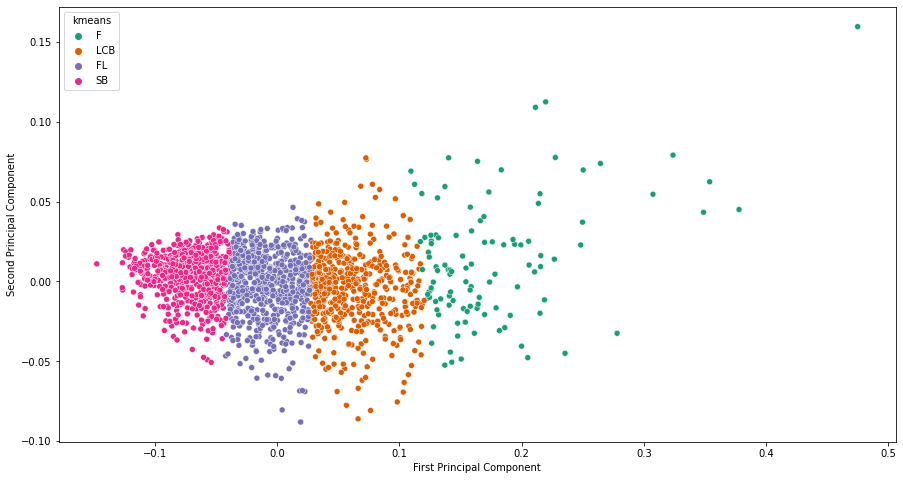

ValueError: No feature in X meets the variance threshold 0.50000

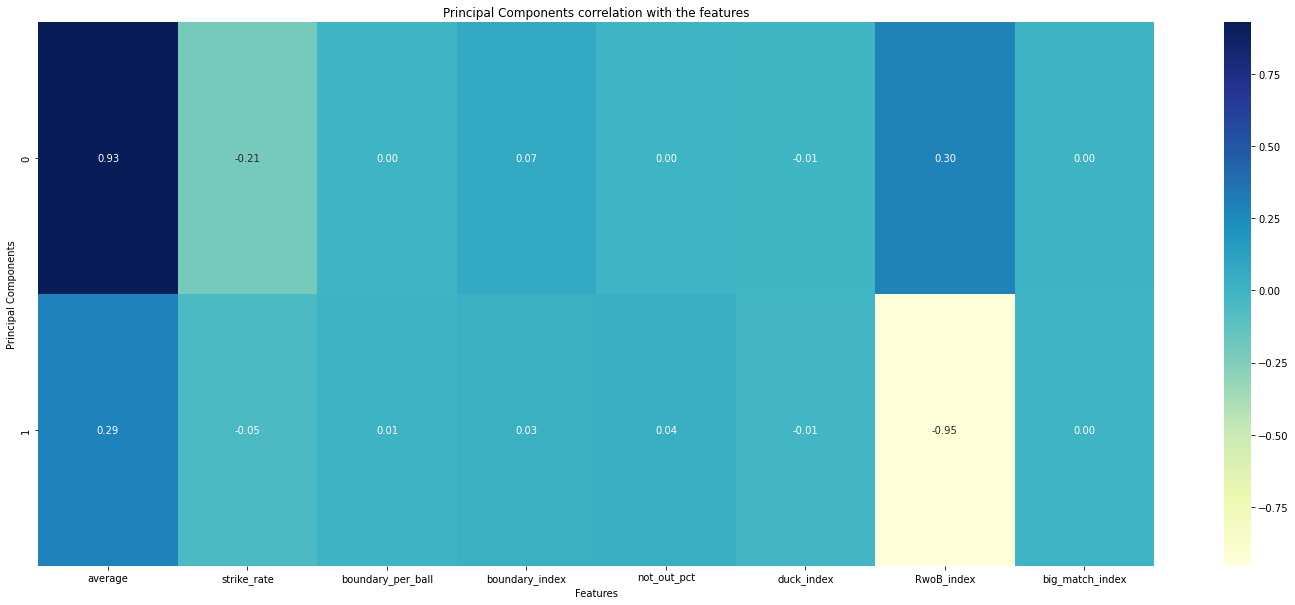

In [91]:
pca = PCA(n_components=2)

pca.fit(clb_scaled)

x_pca = pca.transform(clb_scaled)

print(clb_scaled.shape)

print(x_pca.shape)

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=results['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'}),palette='Dark2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

df = pd.DataFrame(pca.components_ , columns=columns)

fig = plt.figure(figsize=(25, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.5)
selector.fit_transform(clb_scaled)

selector.get_support()

In [92]:
pca.explained_variance_

array([0.00505456, 0.00044095])

In [93]:
pca.explained_variance_ratio_

array([0.90814291, 0.07922489])

In [94]:
dict_pca = dict(zip(columns,np.round(pca.components_[0],3)))
dict_pca

{'average': 0.929,
 'strike_rate': -0.212,
 'boundary_per_ball': 0.0,
 'boundary_index': 0.07,
 'not_out_pct': 0.001,
 'duck_index': -0.008,
 'RwoB_index': 0.295,
 'big_match_index': 0.005}

In [95]:
final_index['pca_score'] = 0
for i in columns:
  final_index['pca_score'] = np.round(final_index['pca_score'] + (final_index[i] * dict_pca.get(i)),3)

In [96]:
final_index[final_index.country.isin(top10countries)].sort_values('pca_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score','rbml_score'],axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,pca_score
1603,NO Miller,WI,0.424,0.903,0.000,0.004,0.008,0.000,0.069,0.000,2,0.223
1432,Abu Hider,BAN,0.395,0.918,0.001,0.012,0.005,0.000,0.019,0.000,2,0.179
7,Mohammad Rizwan,PAK,0.356,0.924,0.001,0.032,0.002,0.000,0.137,0.003,2,0.177
914,AC Voges,AUS,0.351,0.925,0.001,0.015,0.003,0.000,0.144,0.002,2,0.173
719,JM Kemp,SA,0.370,0.925,0.001,0.028,0.003,0.000,0.078,0.001,2,0.173
176,Misbah-ul-Haq,PAK,0.320,0.940,0.001,0.018,0.003,0.001,0.113,0.001,2,0.132
499,ML Hayden,AUS,0.335,0.940,0.002,0.036,0.002,0.000,0.059,0.003,2,0.132
1214,AR Nurse,WI,0.334,0.942,0.001,0.010,0.006,0.000,0.038,0.000,2,0.122
3,Babar Azam,PAK,0.305,0.943,0.001,0.032,0.001,0.000,0.126,0.003,2,0.122
82,DP Conway,NZ,0.305,0.945,0.001,0.029,0.002,0.000,0.112,0.002,2,0.118


In [97]:
train_index = final_index[['name','country','kmeans','rfc_score','xgb_score','voting_score','rbml_score','pca_score']][final_index.country.isin(top10countries)]

In [98]:
train_index['kmeans_role'] = train_index['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})

In [99]:
train_index.drop('kmeans',axis=1)[(train_index.country.isin(top10countries)) & (train_index['kmeans_role']=='SB')].sort_values('rbml_score',ascending=False).head(10)

,name,country,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
606,Mehidy Hasan Miraz,BAN,0.432,0.896,0.732,0.511,-0.082,SB
839,JP Faulkner,AUS,0.432,0.896,0.732,0.510,-0.081,SB
1081,M Mosehle,SA,0.433,0.897,0.732,0.510,-0.081,SB
577,D Pretorius,SA,0.433,0.897,0.733,0.510,-0.078,SB
66,Shahid Afridi,PAK,0.430,0.897,0.731,0.509,-0.086,SB
546,AC Agar,AUS,0.430,0.897,0.731,0.509,-0.084,SB
990,AD Mascarenhas,ENG,0.432,0.897,0.731,0.509,-0.083,SB
1834,PADLR Sandakan,SL,0.430,0.896,0.732,0.509,-0.084,SB
715,DL Vettori,NZ,0.430,0.896,0.731,0.509,-0.083,SB
375,JO Holder,WI,0.430,0.897,0.732,0.509,-0.086,SB


In [100]:
train_index.drop('kmeans',axis=1)[(train_index.country.isin(top10countries)) & (train_index['kmeans_role']=='LCB')].sort_values('rbml_score').head(10)

,name,country,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
742,Asad Shafiq,PAK,0.455,0.889,0.736,0.478,-0.009,LCB
1418,TA Blundell,NZ,0.455,0.890,0.736,0.478,-0.010,LCB
432,Nasir Jamshed,PAK,0.454,0.890,0.738,0.478,-0.013,LCB
760,CD McMillan,NZ,0.455,0.890,0.737,0.479,-0.012,LCB
80,DJ Bravo,WI,0.454,0.890,0.737,0.479,-0.011,LCB
701,Haris Sohail,PAK,0.454,0.890,0.737,0.479,-0.010,LCB
679,SSJ Brooks,WI,0.455,0.890,0.737,0.479,-0.009,LCB
40,AB de Villiers,SA,0.455,0.890,0.737,0.479,-0.009,LCB
109,LD Chandimal,SL,0.456,0.889,0.736,0.479,-0.007,LCB
185,DJ Hussey,AUS,0.455,0.890,0.736,0.479,-0.009,LCB


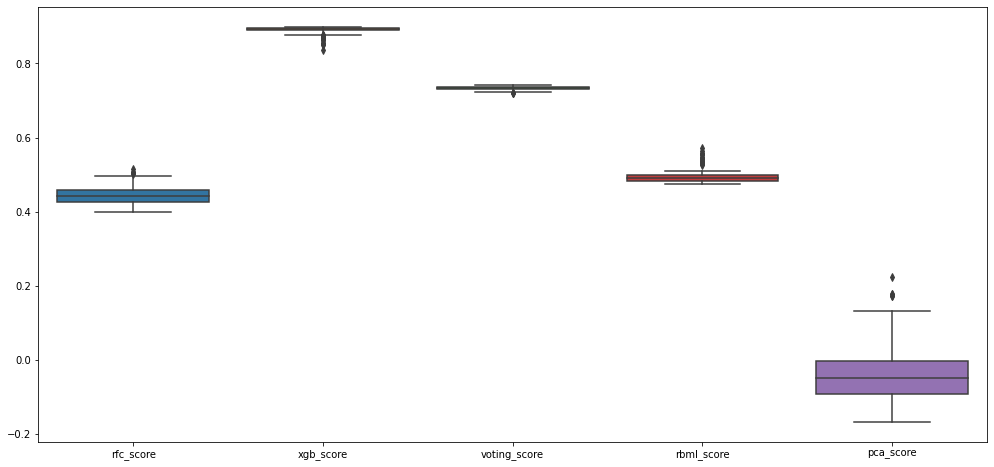

In [101]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=train_index[['rfc_score','xgb_score','voting_score','rbml_score','pca_score']])
plt.show()    

## Training Evaluation

In [117]:
from pathlib import Path

In [102]:
final_training_evaluation = batter.copy()

In [103]:
final_training_evaluation = pd.merge(final_training_evaluation,final_index[['name','country','kmeans','rbml_score','pca_score']],on=['name','country'],how='left')

In [104]:
final_training_evaluation

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,rbml_score,pca_score
0,V Kohli,IND,52.73,137.96,0.163,4.421,0.290,0.037,17.589,0.364,72.746,Best,2,0.554,0.169
1,RG Sharma,IND,31.32,139.24,0.192,3.786,0.121,0.071,9.779,0.264,43.610,Best,1,0.490,0.019
2,MJ Guptill,NZ,31.81,135.70,0.185,4.085,0.059,0.025,10.653,0.203,43.166,Best,1,0.492,0.029
3,Babar Azam,PAK,41.48,128.40,0.156,4.327,0.143,0.051,17.173,0.367,53.260,Best,2,0.538,0.122
4,PR Stirling,IRE,28.63,135.83,0.206,3.977,0.085,0.100,8.415,0.192,38.888,Best,1,0.485,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,T Shamsi,SA,1.80,34.61,0.000,0.000,0.615,0.385,0.692,0.000,0.623,Poor,3,0.487,-0.158
1919,AR Balla,CAM,1.14,23.52,0.000,0.000,0.125,0.375,1.000,0.000,0.268,Poor,3,0.489,-0.155
1920,Xie Kunkun,CHN,2.00,22.22,0.000,0.000,0.000,0.250,2.000,0.000,0.444,Poor,3,0.505,-0.101
1921,P Bhart,NOR,2.50,20.00,0.000,0.000,0.500,0.250,1.250,0.000,0.500,Poor,0,0.475,-0.077


### Analysis

In [105]:
final_training_evaluation['kmeans_role'] = final_training_evaluation['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})

In [108]:
cols_final = final_training_evaluation.columns.tolist()
cols_final = ['name','country','average','strike_rate','boundary_per_ball','boundary_index','not_out_pct','RwoB_index','big_match_index','prelim_metric','prelim_rank','kmeans','kmeans_role', 'rbml_score','pca_score']

In [109]:
final_training_evaluation = final_training_evaluation[cols_final]

In [110]:
final_training_evaluation[(final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
354,Mirza Ahsan,Aut,21.09,163.46,0.207,2.074,0.222,6.259,0.148,34.474,Good,3,SB,0.512,-0.079
901,Amir Mangal,GER,20.28,156.04,0.209,1.900,0.300,5.000,0.000,31.645,Good,3,SB,0.511,-0.080
972,Sachin Mandy,GER,12.70,102.41,0.129,1.455,0.091,5.000,0.000,13.006,Average,3,SB,0.511,-0.081
1124,Amir Ali,OMA,19.40,149.23,0.200,1.625,0.375,5.125,0.000,28.951,Poor,3,SB,0.511,-0.079
1185,MK Anafie,Ghana,14.83,114.10,0.154,1.500,0.250,3.875,0.000,16.921,Poor,3,SB,0.511,-0.079
606,Mehidy Hasan Miraz,BAN,14.58,118.66,0.134,1.400,0.150,5.900,0.000,17.301,Average,3,SB,0.511,-0.082
428,SO Ngoche,KENYA,14.07,110.24,0.130,1.103,0.333,4.359,0.000,15.511,Average,3,SB,0.511,-0.080
726,Ijaz Hussain,ROM,11.82,93.92,0.121,1.300,0.150,4.150,0.000,11.101,Average,3,SB,0.511,-0.080
839,JP Faulkner,AUS,14.45,115.21,0.087,0.667,0.389,5.611,0.000,16.648,Average,3,SB,0.510,-0.081
861,Shahbaz Badar,BHR,11.00,96.25,0.100,1.143,0.000,6.286,0.000,10.588,Average,3,SB,0.510,-0.085


In [111]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
606,Mehidy Hasan Miraz,BAN,14.58,118.66,0.134,1.400,0.150,5.900,0.000,17.301,Average,3,SB,0.511,-0.082
839,JP Faulkner,AUS,14.45,115.21,0.087,0.667,0.389,5.611,0.000,16.648,Average,3,SB,0.510,-0.081
1081,M Mosehle,SA,21.00,161.53,0.231,2.500,0.167,4.500,0.000,33.921,Good,3,SB,0.510,-0.081
577,D Pretorius,SA,21.75,164.15,0.233,2.176,0.294,4.882,0.059,35.703,Good,3,SB,0.510,-0.078
66,Shahid Afridi,PAK,17.92,150.00,0.186,1.934,0.132,6.220,0.044,26.880,Good,3,SB,0.509,-0.086
546,AC Agar,AUS,12.04,101.46,0.103,1.000,0.179,5.250,0.000,12.216,Average,3,SB,0.509,-0.084
990,AD Mascarenhas,ENG,15.37,123.00,0.130,1.000,0.385,4.692,0.000,18.905,Average,3,SB,0.509,-0.083
1834,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.000,4.636,Poor,3,SB,0.509,-0.084
715,DL Vettori,NZ,12.81,107.89,0.084,0.727,0.273,6.227,0.000,13.821,Average,3,SB,0.509,-0.083
375,JO Holder,WI,14.53,119.70,0.132,1.184,0.263,4.816,0.000,17.392,Average,3,SB,0.509,-0.086


In [112]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 2)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
1603,NO Miller,WI,43.00,91.48,0.043,0.400,0.800,7.000,0.000,39.336,Poor,2,F,0.573,0.223
1432,Abu Hider,BAN,58.00,134.88,0.209,1.800,0.800,2.800,0.000,78.230,Poor,2,F,0.563,0.179
719,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,2,F,0.559,0.173
7,Mohammad Rizwan,PAK,49.07,127.30,0.144,4.342,0.219,18.918,0.370,62.466,Best,2,F,0.555,0.177
914,AC Voges,AUS,46.33,121.92,0.088,2.000,0.400,19.000,0.200,56.486,Good,2,F,0.552,0.173
499,ML Hayden,AUS,51.33,143.92,0.234,5.556,0.333,9.111,0.444,73.874,Good,2,F,0.547,0.132
1214,AR Nurse,WI,42.50,119.71,0.141,1.250,0.750,4.875,0.000,50.877,Poor,2,F,0.546,0.122
176,Misbah-ul-Haq,PAK,37.52,110.20,0.099,2.088,0.382,13.294,0.088,41.347,Best,2,F,0.542,0.132
3,Babar Azam,PAK,41.48,128.40,0.156,4.327,0.143,17.173,0.367,53.260,Best,2,F,0.538,0.122
82,DP Conway,NZ,41.60,129.05,0.156,3.974,0.211,15.263,0.237,53.685,Best,2,F,0.538,0.118


In [113]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 0)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
62,E Lewis,WI,29.89,151.97,0.227,4.212,0.058,7.058,0.269,45.424,Best,0,FL,0.498,-0.013
136,ADS Fletcher,WI,21.11,111.37,0.137,2.250,0.135,7.308,0.115,23.510,Good,0,FL,0.497,-0.015
356,Younis Khan,PAK,22.10,121.42,0.118,1.870,0.130,10.696,0.087,26.834,Good,0,FL,0.496,-0.017
611,Shamim Hossain,BAN,22.27,119.51,0.156,2.462,0.154,8.077,0.077,26.615,Good,0,FL,0.496,-0.018
1221,CE McConchie,NZ,21.00,112.00,0.080,0.857,0.429,8.571,0.000,23.520,Poor,0,FL,0.496,-0.015
117,Samiullah Shinwari,AFG,22.02,118.06,0.132,2.018,0.179,8.696,0.036,25.997,Good,0,FL,0.496,-0.016
17,GJ Maxwell,AUS,28.40,150.97,0.197,3.133,0.156,9.100,0.178,42.875,Best,0,FL,0.495,-0.018
107,DJ Mitchell,NZ,24.86,137.22,0.142,2.094,0.189,10.245,0.094,34.113,Best,0,FL,0.495,-0.020
1531,Darwish Rasooli,AFG,16.33,87.50,0.071,0.800,0.400,6.200,0.000,14.289,Poor,0,FL,0.495,-0.017
498,Khushdil Shah,PAK,20.60,110.75,0.125,1.591,0.318,6.500,0.000,22.815,Good,0,FL,0.495,-0.020


In [114]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 1)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
28,DJ Malan,ENG,36.38,132.49,0.179,4.267,0.133,12.400,0.300,48.200,Best,1,LCB,0.504,0.070
1172,Raees Ahmadzai,AFG,30.33,108.33,0.071,1.000,0.500,10.833,0.000,32.856,Poor,1,LCB,0.504,0.075
455,A Symonds,AUS,48.14,169.34,0.216,3.909,0.364,13.182,0.182,81.520,Good,1,LCB,0.504,0.075
196,MEK Hussey,AUS,37.94,136.29,0.157,2.767,0.367,11.300,0.133,51.708,Best,1,LCB,0.503,0.069
10,KS Williamson,NZ,33.29,123.01,0.143,3.376,0.129,14.141,0.200,40.950,Best,1,LCB,0.503,0.073
721,DS Smith,WI,33.83,126.08,0.168,4.500,0.000,14.167,0.333,42.653,Good,1,LCB,0.502,0.069
90,KP Pietersen,ENG,37.93,141.51,0.182,4.194,0.139,14.111,0.194,53.675,Best,1,LCB,0.502,0.066
1548,Hashmatullah Shahidi,AFG,24.00,87.27,0.091,1.250,0.500,7.000,0.000,20.945,Poor,1,LCB,0.501,0.065
304,Noor Ali Zadran,AFG,26.63,101.81,0.103,2.550,0.050,14.500,0.150,27.112,Good,1,LCB,0.501,0.072
251,Salman Butt,PAK,28.33,107.98,0.138,3.304,0.087,11.783,0.130,30.591,Best,1,LCB,0.501,0.063


In [115]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries))].sort_values('pca_score',ascending = False).drop(['rbml_score','kmeans'],axis=1).head(15)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans_role,pca_score
1603,NO Miller,WI,43.00,91.48,0.043,0.400,0.800,7.000,0.000,39.336,Poor,F,0.223
1432,Abu Hider,BAN,58.00,134.88,0.209,1.800,0.800,2.800,0.000,78.230,Poor,F,0.179
7,Mohammad Rizwan,PAK,49.07,127.30,0.144,4.342,0.219,18.918,0.370,62.466,Best,F,0.177
914,AC Voges,AUS,46.33,121.92,0.088,2.000,0.400,19.000,0.200,56.486,Good,F,0.173
719,JM Kemp,SA,50.75,126.87,0.169,3.857,0.429,10.714,0.143,64.387,Good,F,0.173
176,Misbah-ul-Haq,PAK,37.52,110.20,0.099,2.088,0.382,13.294,0.088,41.347,Best,F,0.132
499,ML Hayden,AUS,51.33,143.92,0.234,5.556,0.333,9.111,0.444,73.874,Good,F,0.132
1214,AR Nurse,WI,42.50,119.71,0.141,1.250,0.750,4.875,0.000,50.877,Poor,F,0.122
3,Babar Azam,PAK,41.48,128.40,0.156,4.327,0.143,17.173,0.367,53.260,Best,F,0.122
82,DP Conway,NZ,41.60,129.05,0.156,3.974,0.211,15.263,0.237,53.685,Best,F,0.118


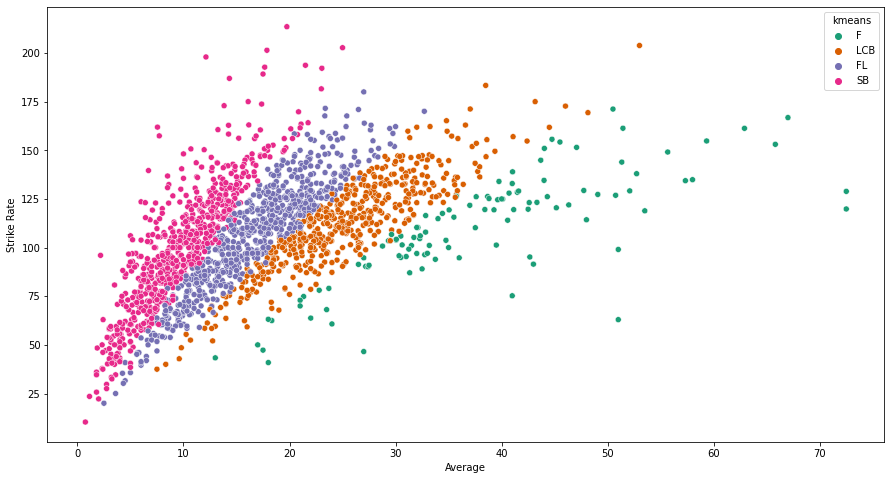

In [116]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x='average', y='strike_rate',data=final_training_evaluation,hue=results['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'}),palette='Dark2')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.show()

In [118]:
filepath_batter_evaluation_train = Path('final_training_evaluation_batter.csv') 
final_training_evaluation.drop('kmeans',axis=1).to_csv(filepath_batter_evaluation_train,index=False)

## Test Evaluation

In [120]:
batter_test = pd.read_csv('Test Batters.csv')

In [121]:
 batter_test

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,prelim_metric,prelim_rank
0,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,0.000,2.143,0.000,4.636,Poor
1,BF Mailata,Samoa,9.50,79.16,0.062,0.750,0.000,0.000,6.000,0.000,7.520,Poor
2,Virk Ali,Fran,25.33,92.68,0.085,1.750,0.250,0.250,10.500,0.250,23.476,Poor
3,JC Darji,TAN,5.57,70.90,0.091,0.714,0.000,0.429,2.714,0.000,3.949,Poor
4,GH Dockrell,IRE,18.75,131.38,0.139,1.234,0.377,0.104,5.896,0.013,24.634,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sarfaraz Ahmed,PAK,27.26,125.26,0.144,2.238,0.286,0.048,9.810,0.071,34.146,Best
131,Sher Sahak,NOR,24.07,151.80,0.203,2.500,0.222,0.000,6.278,0.056,36.538,Good
132,WK Bitis,CRT,15.50,129.16,0.236,2.429,0.143,0.143,2.429,0.000,20.020,Poor
133,Lucky Ali,DEN,12.66,79.16,0.052,0.667,0.200,0.000,7.467,0.000,10.022,Average


In [123]:
batter_test['prelim_rank'].value_counts()

Poor       71
Good       30
Average    22
Best       12
Name: prelim_rank, dtype: int64

In [124]:
batter_test_for_clustering = batter_test.copy().drop(['name','country','prelim_metric','prelim_rank'],axis=1)
batter_test_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
0,7.66,60.52,0.053,0.286,0.571,0.000,2.143,0.000
1,9.50,79.16,0.062,0.750,0.000,0.000,6.000,0.000
2,25.33,92.68,0.085,1.750,0.250,0.250,10.500,0.250
3,5.57,70.90,0.091,0.714,0.000,0.429,2.714,0.000
4,18.75,131.38,0.139,1.234,0.377,0.104,5.896,0.013
...,...,...,...,...,...,...,...,...
130,27.26,125.26,0.144,2.238,0.286,0.048,9.810,0.071
131,24.07,151.80,0.203,2.500,0.222,0.000,6.278,0.056
132,15.50,129.16,0.236,2.429,0.143,0.143,2.429,0.000
133,12.66,79.16,0.052,0.667,0.200,0.000,7.467,0.000


In [125]:
scaler = Normalizer()
batter_test_for_clustering_scaled= scaler.fit_transform(batter_test_for_clustering)

In [126]:
batter_test_for_clustering_scaled = pd.DataFrame(batter_test_for_clustering_scaled,columns = columns)
batter_test_for_clustering_scaled

,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
0,0.125484,0.991419,0.000868,0.004685,0.009354,0.000000,0.035106,0.000000
1,0.118814,0.990032,0.000775,0.009380,0.000000,0.000000,0.075040,0.000000
2,0.262031,0.958746,0.000879,0.018103,0.002586,0.002586,0.108619,0.002586
3,0.078258,0.996134,0.001279,0.010032,0.000000,0.006027,0.038131,0.000000
4,0.141138,0.988946,0.001046,0.009289,0.002838,0.000783,0.044381,0.000098
...,...,...,...,...,...,...,...,...
130,0.211997,0.974129,0.001120,0.017405,0.002224,0.000373,0.076291,0.000552
131,0.156456,0.986706,0.001320,0.016250,0.001443,0.000000,0.040807,0.000364
132,0.119109,0.992527,0.001814,0.018666,0.001099,0.001099,0.018666,0.000000
133,0.157236,0.983159,0.000646,0.008284,0.002484,0.000000,0.092739,0.000000


In [127]:
batter_test_scaled = batter_test_for_clustering_scaled.copy()
batter_test_scaled['name'] = batter_test['name']
batter_test_scaled['country'] = batter_test['country']

cols = batter_test_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


batter_test_scaled = batter_test_scaled [cols]
batter_test_scaled

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index
0,PADLR Sandakan,SL,0.125484,0.991419,0.000868,0.004685,0.009354,0.000000,0.035106,0.000000
1,BF Mailata,Samoa,0.118814,0.990032,0.000775,0.009380,0.000000,0.000000,0.075040,0.000000
2,Virk Ali,Fran,0.262031,0.958746,0.000879,0.018103,0.002586,0.002586,0.108619,0.002586
3,JC Darji,TAN,0.078258,0.996134,0.001279,0.010032,0.000000,0.006027,0.038131,0.000000
4,GH Dockrell,IRE,0.141138,0.988946,0.001046,0.009289,0.002838,0.000783,0.044381,0.000098
...,...,...,...,...,...,...,...,...,...,...
130,Sarfaraz Ahmed,PAK,0.211997,0.974129,0.001120,0.017405,0.002224,0.000373,0.076291,0.000552
131,Sher Sahak,NOR,0.156456,0.986706,0.001320,0.016250,0.001443,0.000000,0.040807,0.000364
132,WK Bitis,CRT,0.119109,0.992527,0.001814,0.018666,0.001099,0.001099,0.018666,0.000000
133,Lucky Ali,DEN,0.157236,0.983159,0.000646,0.008284,0.002484,0.000000,0.092739,0.000000


In [128]:
ypred_test = kmodel.predict(batter_test_for_clustering_scaled)
results_test = batter_test_scaled
results_test['kmeans'] = ypred_test

In [129]:
results_mid = results_test.copy()
final_test_index = results_test.copy()
middle_ovr = pd.DataFrame()


In [130]:
results_0 = results_mid[results_mid['kmeans'] == 0]
results_1 = results_mid[results_mid['kmeans'] == 1]
results_2 = results_mid[results_mid['kmeans'] == 2]
results_3 = results_mid[results_mid['kmeans'] == 3]

#### For 0

In [131]:
results_0['rbml_score'] = 0
for i in columns:
  results_0['rbml_score'] = np.round(results_0['rbml_score'] + (results_0[i] * dict_0.get(i)),3)

In [132]:
middle_ovr = results_0.copy()

#### For 1

In [133]:
results_1['rbml_score'] = 0
for i in columns:
  results_1['rbml_score'] = np.round(results_1['rbml_score'] + (results_1[i] * dict_1.get(i)),3)

In [134]:
middle_ovr = middle_ovr.append(results_1)

#### For 2

In [135]:
results_2['rbml_score'] = 0
for i in columns:
  results_2['rbml_score'] = np.round(results_2['rbml_score'] + (results_2[i] * dict_2.get(i)),3)

In [136]:
middle_ovr = middle_ovr.append(results_2)

#### For 3

In [137]:
results_3['rbml_score'] = 0
for i in columns:
  results_3['rbml_score'] = np.round(results_3['rbml_score'] + (results_3[i] * dict_3.get(i)),3)

In [138]:
middle_ovr = middle_ovr.append(results_3)

In [140]:
middle_ovr

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rbml_score
1,BF Mailata,Samoa,0.118814,0.990032,0.000775,0.009380,0.000000,0.000000,0.075040,0.000000,0,0.474
4,GH Dockrell,IRE,0.141138,0.988946,0.001046,0.009289,0.002838,0.000783,0.044381,0.000098,0,0.479
6,Sirajullah Khadim,PORT,0.142400,0.988820,0.001046,0.008393,0.004790,0.001197,0.043152,0.000000,0,0.480
8,BS Stephenson,Blz,0.170960,0.984097,0.001462,0.022584,0.000868,0.000868,0.042556,0.000868,0,0.490
9,C Rumistrzewicz,ESP,0.138501,0.989222,0.000000,0.000000,0.010868,0.002721,0.046162,0.000000,0,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...
115,Shahzeb Choudhry,SWE,0.105878,0.993053,0.000896,0.007222,0.003611,0.003611,0.050555,0.000000,3,0.506
121,G Manan,ROM,0.106466,0.993938,0.001739,0.018662,0.000000,0.000911,0.020025,0.000000,3,0.503
128,F Campbell,GAMBI,0.111003,0.991013,0.000833,0.009250,0.000000,0.003083,0.074002,0.000000,3,0.510
132,WK Bitis,CRT,0.119109,0.992527,0.001814,0.018666,0.001099,0.001099,0.018666,0.000000,3,0.506


In [141]:
final_test_index = pd.merge(final_test_index,middle_ovr[['name','country','rbml_score']],on=['name','country'],how='left')

In [142]:
final_test_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rbml_score
0,PADLR Sandakan,SL,0.125484,0.991419,0.000868,0.004685,0.009354,0.000000,0.035106,0.000000,3,0.509
1,BF Mailata,Samoa,0.118814,0.990032,0.000775,0.009380,0.000000,0.000000,0.075040,0.000000,0,0.474
2,Virk Ali,Fran,0.262031,0.958746,0.000879,0.018103,0.002586,0.002586,0.108619,0.002586,1,0.502
3,JC Darji,TAN,0.078258,0.996134,0.001279,0.010032,0.000000,0.006027,0.038131,0.000000,3,0.498
4,GH Dockrell,IRE,0.141138,0.988946,0.001046,0.009289,0.002838,0.000783,0.044381,0.000098,0,0.479
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sarfaraz Ahmed,PAK,0.211997,0.974129,0.001120,0.017405,0.002224,0.000373,0.076291,0.000552,1,0.486
131,Sher Sahak,NOR,0.156456,0.986706,0.001320,0.016250,0.001443,0.000000,0.040807,0.000364,0,0.485
132,WK Bitis,CRT,0.119109,0.992527,0.001814,0.018666,0.001099,0.001099,0.018666,0.000000,3,0.506
133,Lucky Ali,DEN,0.157236,0.983159,0.000646,0.008284,0.002484,0.000000,0.092739,0.000000,0,0.487


### PCA Metric

In [143]:
final_test_index['pca_score'] = 0
for i in columns:
  final_test_index['pca_score'] = np.round(final_test_index['pca_score'] + (final_test_index[i] * dict_pca.get(i)),3)

In [144]:
final_test_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,kmeans,rbml_score,pca_score
0,PADLR Sandakan,SL,0.125484,0.991419,0.000868,0.004685,0.009354,0.000000,0.035106,0.000000,3,0.509,-0.083
1,BF Mailata,Samoa,0.118814,0.990032,0.000775,0.009380,0.000000,0.000000,0.075040,0.000000,0,0.474,-0.077
2,Virk Ali,Fran,0.262031,0.958746,0.000879,0.018103,0.002586,0.002586,0.108619,0.002586,1,0.502,0.073
3,JC Darji,TAN,0.078258,0.996134,0.001279,0.010032,0.000000,0.006027,0.038131,0.000000,3,0.498,-0.126
4,GH Dockrell,IRE,0.141138,0.988946,0.001046,0.009289,0.002838,0.000783,0.044381,0.000098,0,0.479,-0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sarfaraz Ahmed,PAK,0.211997,0.974129,0.001120,0.017405,0.002224,0.000373,0.076291,0.000552,1,0.486,0.014
131,Sher Sahak,NOR,0.156456,0.986706,0.001320,0.016250,0.001443,0.000000,0.040807,0.000364,0,0.485,-0.051
132,WK Bitis,CRT,0.119109,0.992527,0.001814,0.018666,0.001099,0.001099,0.018666,0.000000,3,0.506,-0.092
133,Lucky Ali,DEN,0.157236,0.983159,0.000646,0.008284,0.002484,0.000000,0.092739,0.000000,0,0.487,-0.034


#### Test Evaluation Final

In [145]:
final_evaluation_index = batter_test.copy()

In [146]:
final_evaluation_index = pd.merge(final_evaluation_index,final_test_index[['name','country','kmeans','rbml_score','pca_score']],on=['name','country'],how='left')

In [147]:
final_evaluation_index

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,duck_index,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,rbml_score,pca_score
0,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,0.000,2.143,0.000,4.636,Poor,3,0.509,-0.083
1,BF Mailata,Samoa,9.50,79.16,0.062,0.750,0.000,0.000,6.000,0.000,7.520,Poor,0,0.474,-0.077
2,Virk Ali,Fran,25.33,92.68,0.085,1.750,0.250,0.250,10.500,0.250,23.476,Poor,1,0.502,0.073
3,JC Darji,TAN,5.57,70.90,0.091,0.714,0.000,0.429,2.714,0.000,3.949,Poor,3,0.498,-0.126
4,GH Dockrell,IRE,18.75,131.38,0.139,1.234,0.377,0.104,5.896,0.013,24.634,Good,0,0.479,-0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Sarfaraz Ahmed,PAK,27.26,125.26,0.144,2.238,0.286,0.048,9.810,0.071,34.146,Best,1,0.486,0.014
131,Sher Sahak,NOR,24.07,151.80,0.203,2.500,0.222,0.000,6.278,0.056,36.538,Good,0,0.485,-0.051
132,WK Bitis,CRT,15.50,129.16,0.236,2.429,0.143,0.143,2.429,0.000,20.020,Poor,3,0.506,-0.092
133,Lucky Ali,DEN,12.66,79.16,0.052,0.667,0.200,0.000,7.467,0.000,10.022,Average,0,0.487,-0.034


In [148]:
final_evaluation_index['kmeans_role'] = final_evaluation_index['kmeans'].map({0:'FL',1:'LCB',2:'F',3:'SB'})
final_evaluation_index = final_evaluation_index[cols_final]

In [149]:
final_evaluation_index[final_evaluation_index['prelim_rank'] == 'Best']

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
13,Shaheryar Butt,Belg,32.18,146.72,0.202,3.381,0.238,7.857,0.143,47.214,Best,1,LCB,0.486,0.009
36,PBB Rajapaksa,SL,24.21,133.72,0.172,2.636,0.152,8.182,0.091,32.374,Best,0,FL,0.493,-0.024
37,AK Markram,SA,39.37,149.50,0.190,4.091,0.182,13.182,0.273,58.858,Best,1,LCB,0.500,0.059
42,SPD Smith,AUS,25.20,125.21,0.135,2.137,0.216,10.275,0.078,31.553,Best,1,LCB,0.483,0.001
60,HAM Shah,DEN,31.04,114.26,0.130,3.400,0.040,14.760,0.240,35.466,Best,1,LCB,0.504,0.077
72,P Khadka,NEP,27.55,128.04,0.173,3.375,0.094,9.844,0.188,35.275,Best,1,LCB,0.487,0.012
94,P Nissanka,SL,27.45,112.15,0.129,3.073,0.024,13.317,0.220,30.785,Best,1,LCB,0.497,0.051
117,HM Amla,SA,33.60,132.05,0.178,3.909,0.136,12.205,0.182,44.369,Best,1,LCB,0.498,0.051
118,SK Raina,IND,29.18,134.87,0.171,3.076,0.167,10.258,0.106,39.355,Best,1,LCB,0.487,0.013
119,TH David,AUS/SGP,36.59,162.95,0.225,4.440,0.120,11.240,0.240,59.623,Best,1,LCB,0.490,0.019


In [150]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
19,S Ivetic,SRB,42.66,95.16,0.086,2.875,0.250,18.500,0.25,40.595,Good,2,F,0.568,0.238
40,P Sharma,KENYA,40.00,125.00,0.203,3.250,0.500,6.000,0.00,50.000,Poor,2,F,0.537,0.096
49,T Manders,BMUDA,39.63,124.57,0.166,4.833,0.083,14.167,0.25,49.367,Good,2,F,0.537,0.114
124,Anik Ahmed,ITA,26.50,91.37,0.034,0.500,0.500,11.250,0.00,24.213,Poor,2,F,0.528,0.090
128,F Campbell,GAMBI,7.20,64.28,0.054,0.600,0.000,4.800,0.00,4.628,Poor,3,SB,0.510,-0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Zohaib Sarwar,PORT,13.14,98.92,0.097,0.900,0.300,4.400,0.00,12.998,Poor,0,FL,0.476,-0.074
62,S Browne,LUX,10.25,83.67,0.082,1.000,0.000,6.250,0.00,8.576,Poor,0,FL,0.475,-0.074
52,PHKD Mendis,SL,15.20,122.58,0.145,1.800,0.000,6.800,0.00,18.632,Poor,0,FL,0.475,-0.079
1,BF Mailata,Samoa,9.50,79.16,0.062,0.750,0.000,6.000,0.00,7.520,Poor,0,FL,0.474,-0.077


In [151]:
final_evaluation_index['kmeans_role'].value_counts()

SB     51
FL     46
LCB    34
F       4
Name: kmeans_role, dtype: int64

In [152]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
19,S Ivetic,SRB,42.66,95.16,0.086,2.875,0.250,18.500,0.25,40.595,Good,2,F,0.568,0.238
40,P Sharma,KENYA,40.00,125.00,0.203,3.250,0.500,6.000,0.00,50.000,Poor,2,F,0.537,0.096
49,T Manders,BMUDA,39.63,124.57,0.166,4.833,0.083,14.167,0.25,49.367,Good,2,F,0.537,0.114
124,Anik Ahmed,ITA,26.50,91.37,0.034,0.500,0.500,11.250,0.00,24.213,Poor,2,F,0.528,0.090
128,F Campbell,GAMBI,7.20,64.28,0.054,0.600,0.000,4.800,0.00,4.628,Poor,3,SB,0.510,-0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Zohaib Sarwar,PORT,13.14,98.92,0.097,0.900,0.300,4.400,0.00,12.998,Poor,0,FL,0.476,-0.074
62,S Browne,LUX,10.25,83.67,0.082,1.000,0.000,6.250,0.00,8.576,Poor,0,FL,0.475,-0.074
52,PHKD Mendis,SL,15.20,122.58,0.145,1.800,0.000,6.800,0.00,18.632,Poor,0,FL,0.475,-0.079
1,BF Mailata,Samoa,9.50,79.16,0.062,0.750,0.000,6.000,0.00,7.520,Poor,0,FL,0.474,-0.077


In [153]:
final_evaluation_index[final_evaluation_index.country.isin(top10countries)]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
0,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.000,4.636,Poor,3,SB,0.509,-0.083
16,S Mahmood,ENG,7.33,78.57,0.071,0.286,0.571,2.000,0.000,5.759,Poor,3,SB,0.500,-0.118
17,CE McConchie,NZ,21.00,112.00,0.080,0.857,0.429,8.571,0.000,23.520,Poor,0,FL,0.496,-0.014
20,AC Agar,AUS,12.04,101.46,0.103,1.000,0.179,5.250,0.000,12.216,Average,3,SB,0.509,-0.085
24,Abdul Razzaq,PAK,20.68,116.61,0.125,1.448,0.345,6.310,0.000,24.115,Good,0,FL,0.492,-0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,WU Tharanga,SL,16.28,123.33,0.164,2.077,0.038,6.423,0.000,20.078,Good,0,FL,0.478,-0.073
117,HM Amla,SA,33.60,132.05,0.178,3.909,0.136,12.205,0.182,44.369,Best,1,LCB,0.498,0.051
127,MS Wade,AUS,24.82,132.03,0.154,2.088,0.281,8.175,0.053,32.770,Best,0,FL,0.495,-0.018
129,JDP Oram,NZ,20.60,139.82,0.177,2.000,0.233,6.333,0.067,28.803,Good,0,FL,0.482,-0.061


In [155]:
final_evaluation_index[(final_evaluation_index['kmeans_role']=='LCB') & (final_evaluation_index['prelim_rank']!='Poor')]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
7,M Taylor,Bhm,27.20,112.39,0.160,3.867,0.000,8.800,0.200,30.570,Good,1,LCB,0.494,0.037
12,MO Jones,BMUDA,19.33,91.33,0.063,0.571,0.571,5.571,0.000,17.654,Average,1,LCB,0.483,0.003
13,Shaheryar Butt,Belg,32.18,146.72,0.202,3.381,0.238,7.857,0.143,47.214,Best,1,LCB,0.486,0.009
15,Tamoor Sajjad,QAT,34.54,135.71,0.164,3.067,0.267,11.067,0.067,46.874,Good,1,LCB,0.497,0.048
25,P Heron,Caym,23.50,115.57,0.107,1.857,0.143,11.571,0.286,27.159,Good,1,LCB,0.484,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,HM Amla,SA,33.60,132.05,0.178,3.909,0.136,12.205,0.182,44.369,Best,1,LCB,0.498,0.051
118,SK Raina,IND,29.18,134.87,0.171,3.076,0.167,10.258,0.106,39.355,Best,1,LCB,0.487,0.013
119,TH David,AUS/SGP,36.59,162.95,0.225,4.440,0.120,11.240,0.240,59.623,Best,1,LCB,0.490,0.019
120,D Suzuki,JPN,16.87,91.83,0.075,1.000,0.273,8.273,0.000,15.492,Average,1,LCB,0.478,-0.014


In [157]:
final_evaluation_index[(final_evaluation_index['prelim_rank']=='Best')].drop('kmeans',axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans_role,rbml_score,pca_score
13,Shaheryar Butt,Belg,32.18,146.72,0.202,3.381,0.238,7.857,0.143,47.214,Best,LCB,0.486,0.009
36,PBB Rajapaksa,SL,24.21,133.72,0.172,2.636,0.152,8.182,0.091,32.374,Best,FL,0.493,-0.024
37,AK Markram,SA,39.37,149.50,0.190,4.091,0.182,13.182,0.273,58.858,Best,LCB,0.500,0.059
42,SPD Smith,AUS,25.20,125.21,0.135,2.137,0.216,10.275,0.078,31.553,Best,LCB,0.483,0.001
60,HAM Shah,DEN,31.04,114.26,0.130,3.400,0.040,14.760,0.240,35.466,Best,LCB,0.504,0.077
72,P Khadka,NEP,27.55,128.04,0.173,3.375,0.094,9.844,0.188,35.275,Best,LCB,0.487,0.012
94,P Nissanka,SL,27.45,112.15,0.129,3.073,0.024,13.317,0.220,30.785,Best,LCB,0.497,0.051
117,HM Amla,SA,33.60,132.05,0.178,3.909,0.136,12.205,0.182,44.369,Best,LCB,0.498,0.051
118,SK Raina,IND,29.18,134.87,0.171,3.076,0.167,10.258,0.106,39.355,Best,LCB,0.487,0.013
119,TH David,AUS/SGP,36.59,162.95,0.225,4.440,0.120,11.240,0.240,59.623,Best,LCB,0.490,0.019


In [158]:
final_evaluation_index[(final_evaluation_index['kmeans_role']=='SB')].drop('kmeans',axis=1)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans_role,rbml_score,pca_score
0,PADLR Sandakan,SL,7.66,60.52,0.053,0.286,0.571,2.143,0.0,4.636,Poor,SB,0.509,-0.083
3,JC Darji,TAN,5.57,70.90,0.091,0.714,0.000,2.714,0.0,3.949,Poor,SB,0.498,-0.126
14,S Sola,Samoa,7.71,72.00,0.067,0.625,0.125,3.500,0.0,5.551,Poor,SB,0.506,-0.097
16,S Mahmood,ENG,7.33,78.57,0.071,0.286,0.571,2.000,0.0,5.759,Poor,SB,0.500,-0.118
18,Haseeb Amjad,HKG,11.25,100.00,0.089,0.400,0.600,2.700,0.0,11.250,Poor,SB,0.505,-0.099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Shahzeb Choudhry,SWE,7.33,68.75,0.062,0.500,0.250,3.500,0.0,5.039,Poor,SB,0.506,-0.097
121,G Manan,ROM,16.71,156.00,0.273,2.929,0.000,3.143,0.0,26.068,Good,SB,0.503,-0.105
128,F Campbell,GAMBI,7.20,64.28,0.054,0.600,0.000,4.800,0.0,4.628,Poor,SB,0.510,-0.084
132,WK Bitis,CRT,15.50,129.16,0.236,2.429,0.143,2.429,0.0,20.020,Poor,SB,0.506,-0.092


In [159]:
final_evaluation_index[(final_evaluation_index.country.isin(top10countries)) & (final_evaluation_index['kmeans_role']=='LCB')]

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
37,AK Markram,SA,39.37,149.50,0.190,4.091,0.182,13.182,0.273,58.858,Best,1,LCB,0.500,0.059
42,SPD Smith,AUS,25.20,125.21,0.135,2.137,0.216,10.275,0.078,31.553,Best,1,LCB,0.483,0.001
83,MH Yardy,ENG,32.00,133.33,0.139,1.250,0.625,6.750,0.000,42.666,Poor,1,LCB,0.491,0.027
94,P Nissanka,SL,27.45,112.15,0.129,3.073,0.024,13.317,0.220,30.785,Best,1,LCB,0.497,0.051
102,IR Bell,ENG,26.85,115.33,0.153,3.125,0.125,10.500,0.125,30.966,Good,1,LCB,0.492,0.032
104,Raees Ahmadzai,AFG,30.33,108.33,0.071,1.000,0.500,10.833,0.000,32.856,Poor,1,LCB,0.504,0.075
117,HM Amla,SA,33.60,132.05,0.178,3.909,0.136,12.205,0.182,44.369,Best,1,LCB,0.498,0.051
130,Sarfaraz Ahmed,PAK,27.26,125.26,0.144,2.238,0.286,9.810,0.071,34.146,Best,1,LCB,0.486,0.014


In [160]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score
19,S Ivetic,SRB,42.66,95.16,0.086,2.875,0.250,18.500,0.25,40.595,Good,2,F,0.568,0.238
40,P Sharma,KENYA,40.00,125.00,0.203,3.250,0.500,6.000,0.00,50.000,Poor,2,F,0.537,0.096
49,T Manders,BMUDA,39.63,124.57,0.166,4.833,0.083,14.167,0.25,49.367,Good,2,F,0.537,0.114
124,Anik Ahmed,ITA,26.50,91.37,0.034,0.500,0.500,11.250,0.00,24.213,Poor,2,F,0.528,0.090
128,F Campbell,GAMBI,7.20,64.28,0.054,0.600,0.000,4.800,0.00,4.628,Poor,3,SB,0.510,-0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Zohaib Sarwar,PORT,13.14,98.92,0.097,0.900,0.300,4.400,0.00,12.998,Poor,0,FL,0.476,-0.074
62,S Browne,LUX,10.25,83.67,0.082,1.000,0.000,6.250,0.00,8.576,Poor,0,FL,0.475,-0.074
52,PHKD Mendis,SL,15.20,122.58,0.145,1.800,0.000,6.800,0.00,18.632,Poor,0,FL,0.475,-0.079
1,BF Mailata,Samoa,9.50,79.16,0.062,0.750,0.000,6.000,0.00,7.520,Poor,0,FL,0.474,-0.077


In [161]:
filepath_batter_evaluation_test = Path('final_test_evaluation_batter.csv') 
final_evaluation_index.drop('kmeans',axis=1).to_csv(filepath_batter_evaluation_test,index=False)

# Top 10 ICC ANALYSIS

In [162]:
top10AllTimeBatters = {'SA Yadav':1, 
                       'Mohammad Rizwan':2,
                       'AK Markram':3,
                       'Babar Azam':4,
                       'RR Rossouw':5,
                       'DJ Malan':6,
                       'Muhammad Waseem':7,
                       'JC Buttler':8,
                       'AJ Finch':9,
                       'RR Hendricks':10}

In [163]:
top10ICC = final_training_evaluation[final_training_evaluation.name.isin(top10AllTimeBatters.keys())].copy()
top10ICC['hussey_index'] =  top10ICC['average'] + top10ICC['strike_rate']

In [164]:
top10ICC['ICC_rank'] = top10ICC.name.apply(lambda x: top10AllTimeBatters.get(x))

In [165]:
top10ICC

,name,country,average,strike_rate,boundary_per_ball,boundary_index,not_out_pct,RwoB_index,big_match_index,prelim_metric,prelim_rank,kmeans,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank
3,Babar Azam,PAK,41.48,128.40,0.156,4.327,0.143,17.173,0.367,53.260,Best,2,F,0.538,0.122,169.88,4
5,AJ Finch,AUS,34.28,142.53,0.198,4.214,0.117,11.010,0.223,48.859,Best,1,LCB,0.493,0.035,176.81,9
7,Mohammad Rizwan,PAK,49.07,127.30,0.144,4.342,0.219,18.918,0.370,62.466,Best,2,F,0.555,0.177,176.37,2
8,JC Buttler,ENG,35.01,144.66,0.189,3.610,0.210,10.880,0.220,50.645,Best,1,LCB,0.494,0.037,179.67,8
28,DJ Malan,ENG,36.38,132.49,0.179,4.267,0.133,12.400,0.300,48.200,Best,1,LCB,0.504,0.070,168.87,6
30,SA Yadav,IND,46.02,172.70,0.253,5.400,0.200,11.060,0.420,79.477,Best,1,LCB,0.499,0.055,218.72,1
45,RR Hendricks,SA,31.63,130.55,0.175,4.170,0.019,13.151,0.264,41.293,Best,1,LCB,0.496,0.043,162.18,10
73,Muhammad Waseem,UAE,44.03,150.97,0.210,5.750,0.062,12.781,0.469,66.472,Best,2,F,0.529,0.083,195.00,7
108,AK Markram,SA,39.37,149.50,0.190,4.091,0.182,13.182,0.273,58.858,Best,1,LCB,0.500,0.059,188.87,3
181,RR Rossouw,SA,34.86,159.79,0.225,4.000,0.185,9.519,0.259,55.703,Best,1,LCB,0.488,0.010,194.65,5


In [167]:
final_top10ICC = top10ICC[['name','country','prelim_metric','prelim_rank','kmeans_role','rbml_score','pca_score','hussey_index','ICC_rank']]
final_top10ICC

,name,country,prelim_metric,prelim_rank,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank
3,Babar Azam,PAK,53.260,Best,F,0.538,0.122,169.88,4
5,AJ Finch,AUS,48.859,Best,LCB,0.493,0.035,176.81,9
7,Mohammad Rizwan,PAK,62.466,Best,F,0.555,0.177,176.37,2
8,JC Buttler,ENG,50.645,Best,LCB,0.494,0.037,179.67,8
28,DJ Malan,ENG,48.200,Best,LCB,0.504,0.070,168.87,6
30,SA Yadav,IND,79.477,Best,LCB,0.499,0.055,218.72,1
45,RR Hendricks,SA,41.293,Best,LCB,0.496,0.043,162.18,10
73,Muhammad Waseem,UAE,66.472,Best,F,0.529,0.083,195.00,7
108,AK Markram,SA,58.858,Best,LCB,0.500,0.059,188.87,3
181,RR Rossouw,SA,55.703,Best,LCB,0.488,0.010,194.65,5


In [168]:
final_top10ICC['RBML_rank'] = final_top10ICC['rbml_score'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['PCA_rank'] = final_top10ICC['pca_score'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['hussey_rank'] = final_top10ICC['hussey_index'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['prelim_rank'] = final_top10ICC['prelim_metric'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC

,name,country,prelim_metric,prelim_rank,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank,RBML_rank,PCA_rank,hussey_rank
3,Babar Azam,PAK,53.260,6.0,F,0.538,0.122,169.88,4,2.0,2.0,8.0
5,AJ Finch,AUS,48.859,8.0,LCB,0.493,0.035,176.81,9,9.0,9.0,6.0
7,Mohammad Rizwan,PAK,62.466,3.0,F,0.555,0.177,176.37,2,1.0,1.0,7.0
8,JC Buttler,ENG,50.645,7.0,LCB,0.494,0.037,179.67,8,8.0,8.0,5.0
28,DJ Malan,ENG,48.200,9.0,LCB,0.504,0.070,168.87,6,4.0,4.0,9.0
30,SA Yadav,IND,79.477,1.0,LCB,0.499,0.055,218.72,1,6.0,6.0,1.0
45,RR Hendricks,SA,41.293,10.0,LCB,0.496,0.043,162.18,10,7.0,7.0,10.0
73,Muhammad Waseem,UAE,66.472,2.0,F,0.529,0.083,195.00,7,3.0,3.0,2.0
108,AK Markram,SA,58.858,4.0,LCB,0.500,0.059,188.87,3,5.0,5.0,4.0
181,RR Rossouw,SA,55.703,5.0,LCB,0.488,0.010,194.65,5,10.0,10.0,3.0


In [169]:
convert_dtypes = {'RBML_rank':int,'PCA_rank':int,'hussey_rank':int,'prelim_rank':int}
final_top10ICC=final_top10ICC.astype(convert_dtypes)

In [170]:
final_top10ICC

,name,country,prelim_metric,prelim_rank,kmeans_role,rbml_score,pca_score,hussey_index,ICC_rank,RBML_rank,PCA_rank,hussey_rank
3,Babar Azam,PAK,53.260,6,F,0.538,0.122,169.88,4,2,2,8
5,AJ Finch,AUS,48.859,8,LCB,0.493,0.035,176.81,9,9,9,6
7,Mohammad Rizwan,PAK,62.466,3,F,0.555,0.177,176.37,2,1,1,7
8,JC Buttler,ENG,50.645,7,LCB,0.494,0.037,179.67,8,8,8,5
28,DJ Malan,ENG,48.200,9,LCB,0.504,0.070,168.87,6,4,4,9
30,SA Yadav,IND,79.477,1,LCB,0.499,0.055,218.72,1,6,6,1
45,RR Hendricks,SA,41.293,10,LCB,0.496,0.043,162.18,10,7,7,10
73,Muhammad Waseem,UAE,66.472,2,F,0.529,0.083,195.00,7,3,3,2
108,AK Markram,SA,58.858,4,LCB,0.500,0.059,188.87,3,5,5,4
181,RR Rossouw,SA,55.703,5,LCB,0.488,0.010,194.65,5,10,10,3


In [172]:
final_top10ICC = final_top10ICC[['ICC_rank','name','country','prelim_metric','prelim_rank','prelim_rank','kmeans_role','rbml_score','RBML_rank','pca_score','PCA_rank','hussey_index','hussey_rank']]

In [173]:
final_top10ICC.sort_values('ICC_rank')

,ICC_rank,name,country,prelim_metric,prelim_rank,prelim_rank,kmeans_role,rbml_score,RBML_rank,pca_score,PCA_rank,hussey_index,hussey_rank
30,1,SA Yadav,IND,79.477,1,1,LCB,0.499,6,0.055,6,218.72,1
7,2,Mohammad Rizwan,PAK,62.466,3,3,F,0.555,1,0.177,1,176.37,7
108,3,AK Markram,SA,58.858,4,4,LCB,0.500,5,0.059,5,188.87,4
3,4,Babar Azam,PAK,53.260,6,6,F,0.538,2,0.122,2,169.88,8
181,5,RR Rossouw,SA,55.703,5,5,LCB,0.488,10,0.010,10,194.65,3
28,6,DJ Malan,ENG,48.200,9,9,LCB,0.504,4,0.070,4,168.87,9
73,7,Muhammad Waseem,UAE,66.472,2,2,F,0.529,3,0.083,3,195.00,2
8,8,JC Buttler,ENG,50.645,7,7,LCB,0.494,8,0.037,8,179.67,5
5,9,AJ Finch,AUS,48.859,8,8,LCB,0.493,9,0.035,9,176.81,6
45,10,RR Hendricks,SA,41.293,10,10,LCB,0.496,7,0.043,7,162.18,10


In [174]:
filepath_batter_icc = Path('ICC_allTime_top_10_batter.csv') 
final_top10ICC.sort_values('ICC_rank').to_csv(filepath_batter_icc,index=False)